# Load the dataset

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
ds = pd.read_csv('[Kazakhstan-Almaty Qalasy-Almaty]_daily-avg.csv')

# Basic exploration

In [ ]:
print(ds.head())

In [3]:
print(ds.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1516 entries, 0 to 1515
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         1516 non-null   object 
 1   State           1516 non-null   object 
 2   City            1516 non-null   object 
 3   Timestamp(UTC)  1516 non-null   object 
 4   PM2.5           1516 non-null   float64
 5   PM10            1154 non-null   float64
 6   CO              1091 non-null   float64
 7   NO2             1094 non-null   float64
 8   SO2             1094 non-null   float64
dtypes: float64(5), object(4)
memory usage: 106.7+ KB
None


In [4]:
print(ds.describe())

             PM2.5         PM10           CO          NO2          SO2
count  1516.000000  1154.000000  1091.000000  1094.000000  1094.000000
mean     33.606577    40.523050   614.689973    20.815905     8.018967
std      33.584196    37.884864   249.933478    18.513076     5.811102
min       3.060000     5.160000    33.560000     0.950000     1.310000
25%      10.612500    13.350000   477.145000     7.800000     4.302500
50%      20.370000    25.395000   579.790000    16.100000     6.105000
75%      43.820000    54.512500   715.950000    27.510000     9.567500
max     241.830000   224.970000  2587.280000   155.390000    50.010000


In [ ]:
print(ds.columns) 

In [ ]:
#Data Range: Check the range of available data points by examining the minimum and maximum values for each column
print(ds.min())
print(ds.max())

In [ ]:
print(ds.dtypes) 

In [5]:
#Missing Values
print(ds.isnull().sum()) 

Country             0
State               0
City                0
Timestamp(UTC)      0
PM2.5               0
PM10              362
CO                425
NO2               422
SO2               422
dtype: int64


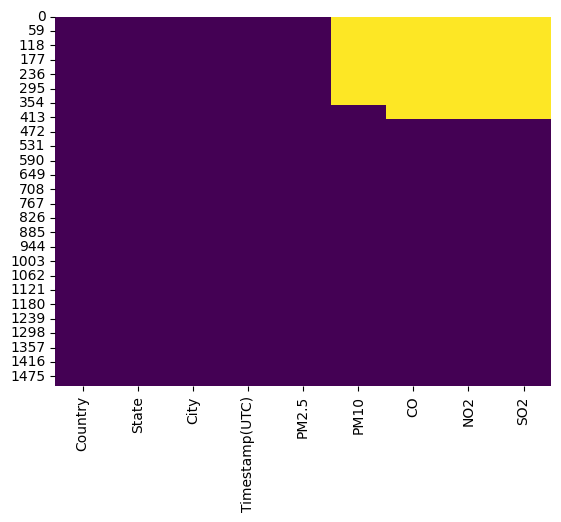

In [6]:
#To visualize missing values using a heatmap
sns.heatmap(ds.isnull(), cbar=False, cmap='viridis')
plt.show()

In [8]:
print(ds.describe())

             PM2.5         PM10           CO          NO2          SO2
count  1516.000000  1516.000000  1516.000000  1516.000000  1516.000000
mean     33.606577    40.523050   614.689973    20.815905     8.018967
std      33.584196    33.050198   211.997805    15.724699     4.935854
min       3.060000     5.160000    33.560000     0.950000     1.310000
25%      10.612500    16.015000   523.365000    10.190000     4.977500
50%      20.370000    40.523050   614.689973    20.815905     8.018967
75%      43.820000    43.520000   654.485000    22.352500     8.018967
max     241.830000   224.970000  2587.280000   155.390000    50.010000


In [9]:
#Numerical columns
num_cols = []
for col in ds.columns:
    if ds[col].dtypes != 'O':
        num_cols.append(col)

C:\Users\Sagat\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Sagat\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Sagat\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categori

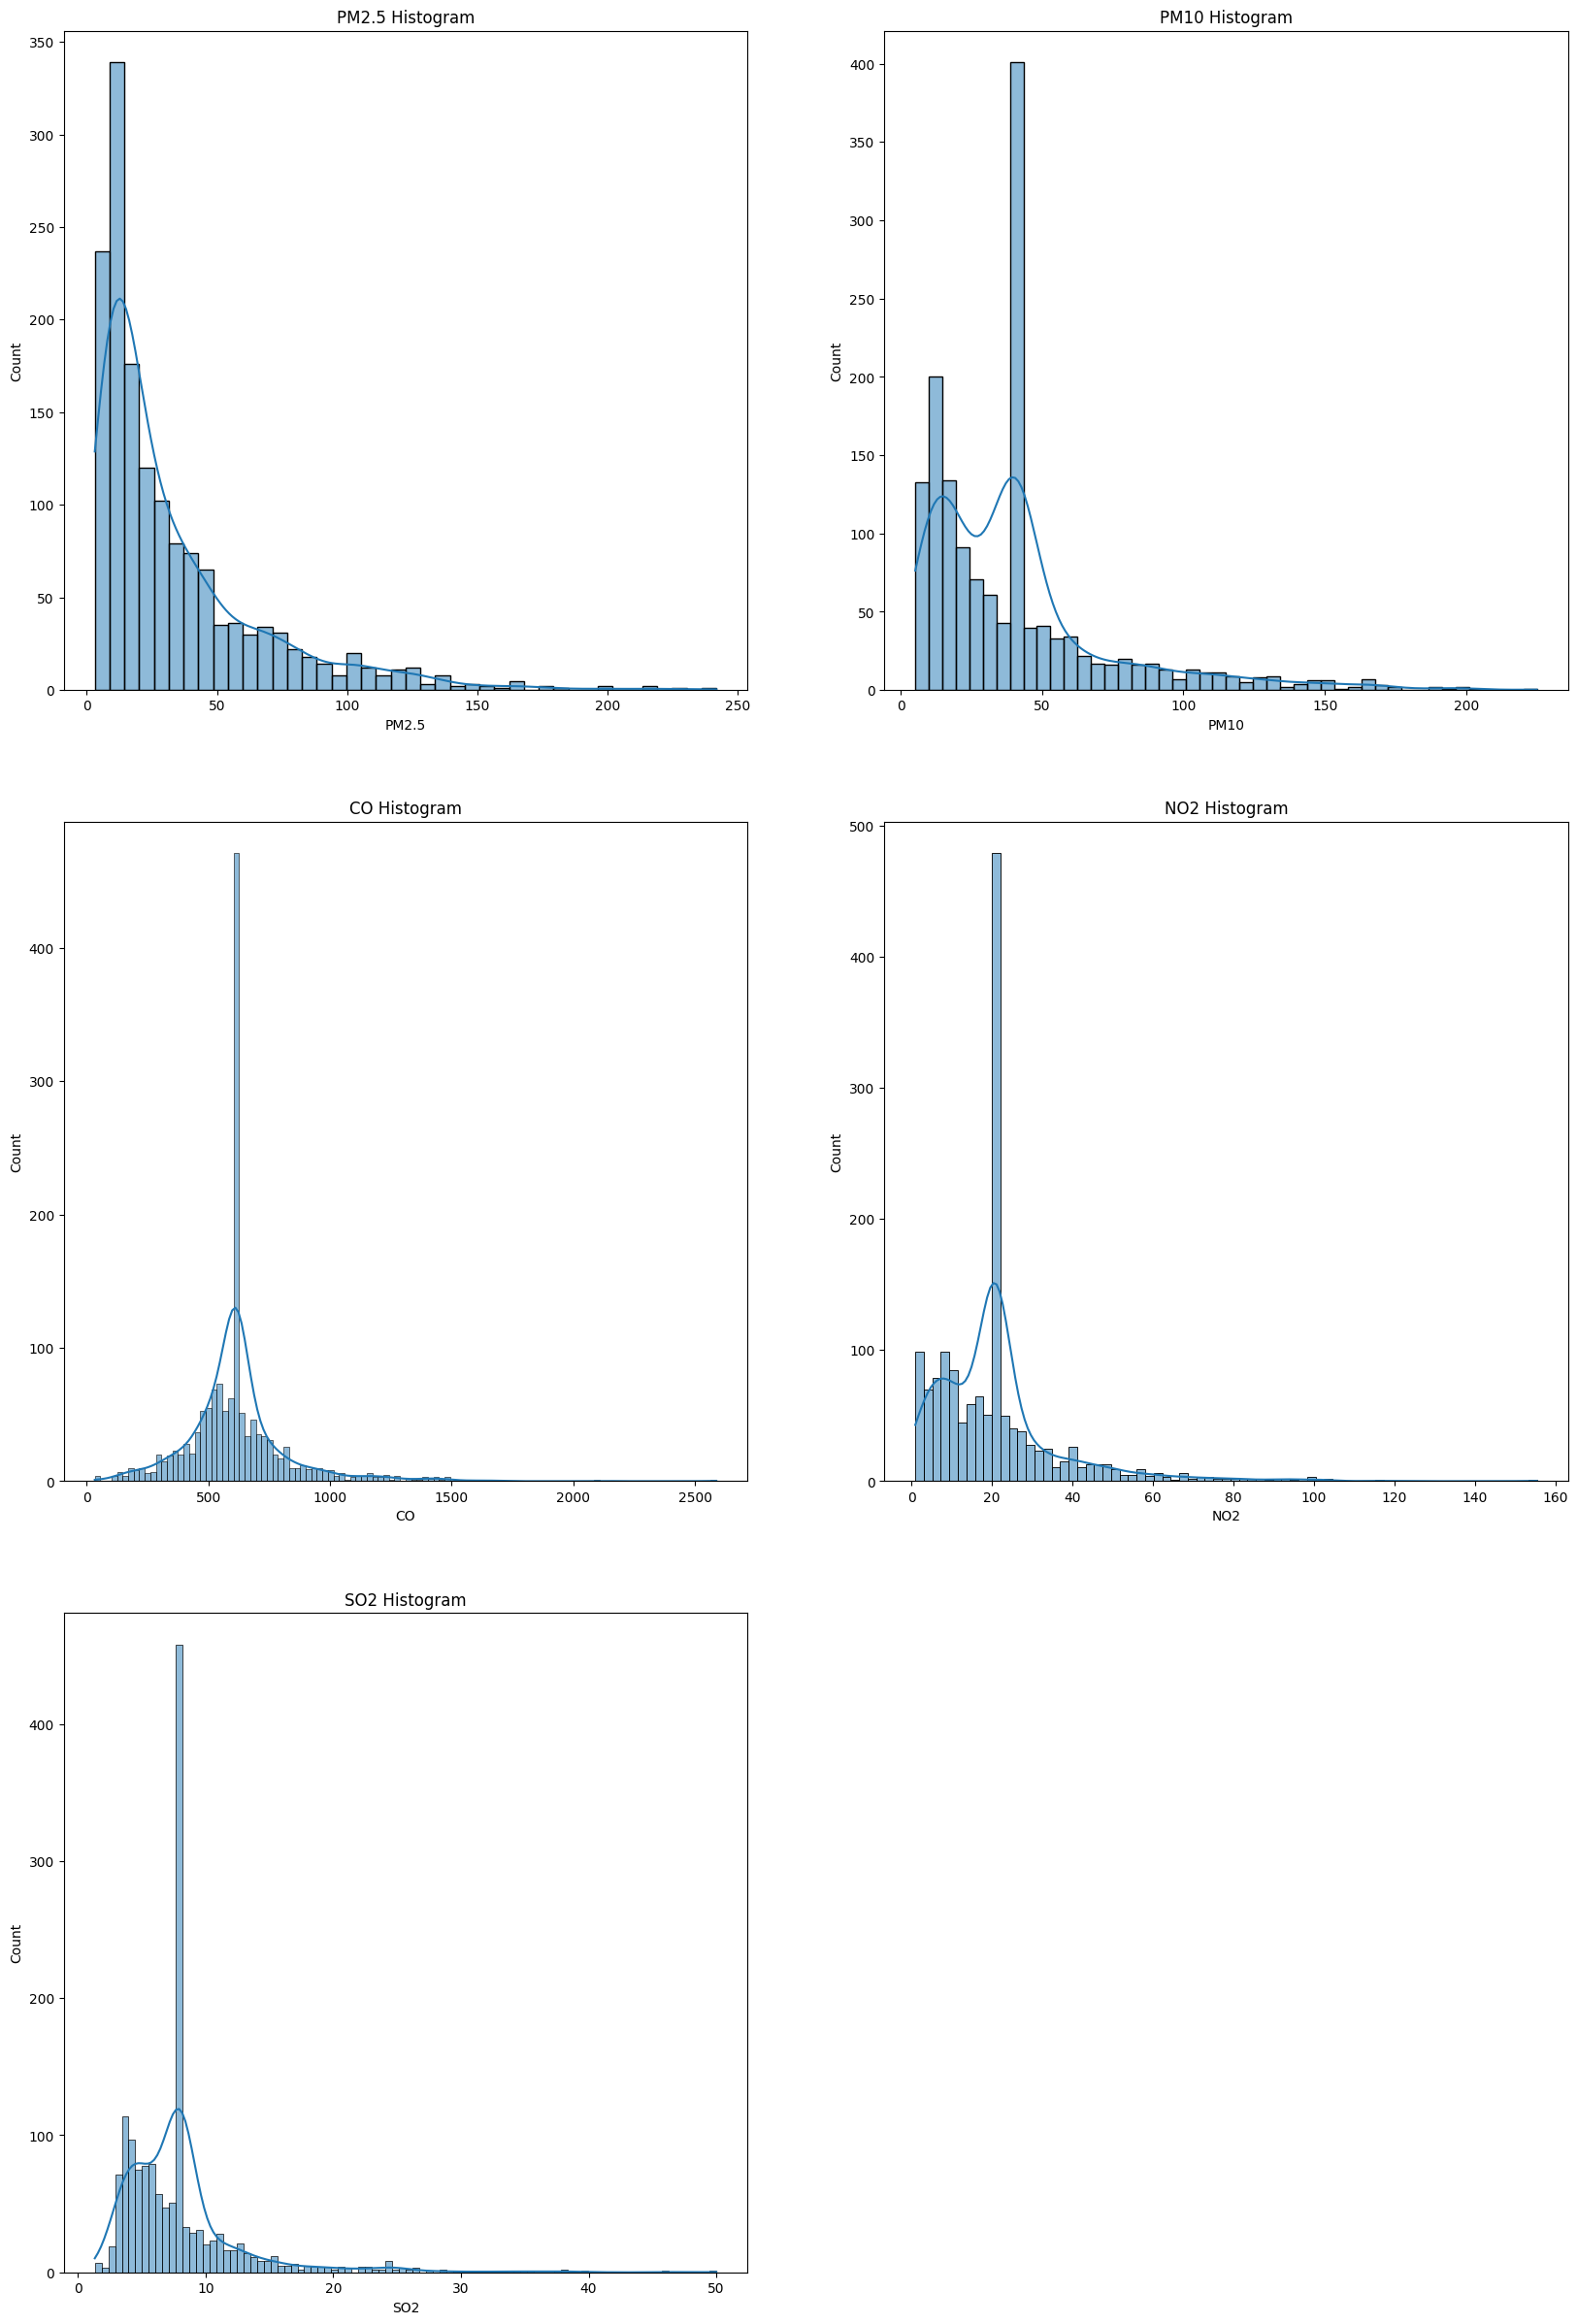

In [10]:
#Distribution of numerical columns
plt.figure(figsize = (20, 30))
for i, col in enumerate(num_cols):
    ax = plt.subplot(3, 2, i + 1)
    sns.histplot(ds[col], kde = True)
    ax.set_title(col + " Histogram")
plt.show()

# Data preprocessing

Handling missing values

In [3]:
# Separate categorical and numerical columns
categorical_columns = ['Country', 'State', 'City', 'Timestamp(UTC)']
numerical_columns = ['PM2.5', 'PM10', 'CO', 'NO2', 'SO2']

# Calculate means only for numerical columns
means = ds[numerical_columns].mean()

# Fill missing values with means
ds[numerical_columns] = ds[numerical_columns].fillna(means)

# Print the number of missing values after imputation
print(ds.isnull().sum())

Country           0
State             0
City              0
Timestamp(UTC)    0
PM2.5             0
PM10              0
CO                0
NO2               0
SO2               0
dtype: int64


Data Type Conversion

In [4]:
ds['Timestamp'] = pd.to_datetime(ds['Timestamp(UTC)'])

In [5]:
# Assuming your dataset is loaded into a DataFrame called 'ds'
# Convert numerical columns to numeric formats
numerical_columns = ['PM2.5', 'PM10', 'CO', 'NO2', 'SO2']
ds[numerical_columns] = ds[numerical_columns].apply(pd.to_numeric, errors='coerce')


Feature engineering

In [6]:
ds['Month'] = ds['Timestamp'].dt.month
ds['Year'] = ds['Timestamp'].dt.year

In [ ]:
# Display the first few rows of the updated dataset
print(ds.head())

In [7]:
def calculate_aqi_us_pm25(pm25):
    if 0 <= pm25 <= 12.0:
        return (50 / 12.0) * pm25
    elif 12.1 <= pm25 <= 35.4:
        return ((100 - 51) / (35.4 - 12.1)) * (pm25 - 12.1) + 51
    elif 35.5 <= pm25 <= 55.4:
        return ((150 - 101) / (55.4 - 35.5)) * (pm25 - 35.5) + 101
    elif 55.5 <= pm25 <= 150.4:
        return ((200 - 151) / (150.4 - 55.5)) * (pm25 - 55.5) + 151
    elif 150.5 <= pm25 <= 250.4:
        return ((300 - 201) / (250.4 - 150.5)) * (pm25 - 150.5) + 201
    elif 250.5 <= pm25 <= 500.4:
        return ((500 - 301) / (500.4 - 250.5)) * (pm25 - 250.5) + 301
    else:
        return 500  # Maximum AQI value

# Apply the function to the PM2.5 column
ds['AQI_US_PM2.5'] = ds['PM2.5'].apply(calculate_aqi_us_pm25)


In [8]:
def calculate_aqi_us_pm10(pm10):
    if 0 <= pm10 <= 54:
        return (50 / 54) * pm10
    elif 55 <= pm10 <= 154:
        return ((100 - 51) / (154 - 55)) * (pm10 - 55) + 51
    elif 155 <= pm10 <= 254:
        return ((150 - 101) / (254 - 155)) * (pm10 - 155) + 101
    elif 255 <= pm10 <= 354:
        return ((200 - 151) / (354 - 255)) * (pm10 - 255) + 151
    elif 355 <= pm10 <= 424:
        return ((300 - 201) / (424 - 355)) * (pm10 - 355) + 201
    elif 425 <= pm10 <= 604:
        return ((500 - 301) / (604 - 425)) * (pm10 - 425) + 301
    else:
        return 500  # Maximum AQI value

# Apply the function to the PM10 column
ds['AQI_US_PM10'] = ds['PM10'].apply(calculate_aqi_us_pm10)


In [ ]:
def calculate_aqi_us_co(co):
    if 0 <= co <= 4.4:
        return (50 / 4.4) * co
    elif 4.5 <= co <= 9.4:
        return ((100 - 51) / (9.4 - 4.5)) * (co - 4.5) + 51
    elif 9.5 <= co <= 12.4:
        return ((150 - 101) / (12.4 - 9.5)) * (co - 9.5) + 101
    elif 12.5 <= co <= 15.4:
        return ((200 - 151) / (15.4 - 12.5)) * (co - 12.5) + 151
    elif 15.5 <= co <= 30.4:
        return ((300 - 201) / (30.4 - 15.5)) * (co - 15.5) + 201
    elif 30.5 <= co <= 50.4:
        return ((500 - 301) / (50.4 - 30.5)) * (co - 30.5) + 301
    else:
        return 500  # Maximum AQI value

# Apply the function to the CO column
ds['AQI_US_CO'] = ds['CO'].apply(calculate_aqi_us_co)


In [ ]:
def calculate_aqi_us_no2(no2):
    if 0 <= no2 <= 53:
        return (50 / 53) * no2
    elif 54 <= no2 <= 100:
        return ((100 - 51) / (100 - 54)) * (no2 - 54) + 51
    elif 101 <= no2 <= 360:
        return ((150 - 101) / (360 - 101)) * (no2 - 101) + 101
    elif 361 <= no2 <= 649:
        return ((200 - 151) / (649 - 361)) * (no2 - 361) + 151
    elif 650 <= no2 <= 1249:
        return ((300 - 201) / (1249 - 650)) * (no2 - 650) + 201
    elif 1250 <= no2 <= 2049:
        return ((500 - 301) / (2049 - 1250)) * (no2 - 1250) + 301
    else:
        return 500  # Maximum AQI value

# Apply the function to the NO2 column
ds['AQI_US_NO2'] = ds['NO2'].apply(calculate_aqi_us_no2)


In [ ]:
def calculate_aqi_us_so2(so2):
    if 0 <= so2 <= 35:
        return (50 / 35) * so2
    elif 36 <= so2 <= 75:
        return ((100 - 51) / (75 - 36)) * (so2 - 36) + 51
    elif 76 <= so2 <= 185:
        return ((150 - 101) / (185 - 76)) * (so2 - 76) + 101
    elif 186 <= so2 <= 304:
        return ((200 - 151) / (304 - 186)) * (so2 - 186) + 151
    elif 305 <= so2 <= 604:
        return ((300 - 201) / (604 - 305)) * (so2 - 305) + 201
    elif 605 <= so2 <= 1004:
        return ((500 - 301) / (1004 - 605)) * (so2 - 605) + 301
    else:
        return 500  # Maximum AQI value

# Apply the function to the SO2 column
ds['AQI_US_SO2'] = ds['SO2'].apply(calculate_aqi_us_so2)


New data from another dataset

In [9]:
weather = pd.read_csv("weather.csv", encoding='latin-1', sep=';')

C:\Users\Sagat\AppData\Local\Temp\ipykernel_20188\191623328.py:1: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  weather = pd.read_csv("weather.csv", encoding='latin-1', sep=';')


In [19]:
print(weather.describe())

                  T            P0             P             U            Ff  \
count  75042.000000  75022.000000  75029.000000  75040.000000  75042.000000   
mean      10.535900    704.161289    763.732799     62.095949      2.451094   
std       12.467665      3.922693      5.976413     25.038994      1.596966   
min      -24.000000    689.300000    748.500000      6.000000      0.000000   
25%        0.000000    701.400000    759.000000     40.000000      1.000000   
50%       11.000000    704.000000    763.500000     64.000000      2.000000   
75%       20.000000    706.800000    768.100000     86.000000      3.000000   
max       41.000000    719.100000    786.900000    100.000000     22.000000   

             ff10  Unnamed: 14  
count  594.000000   188.000000  
mean    13.936027    -5.750000  
std      3.528150     5.405112  
min      7.000000   -25.000000  
25%     12.000000    -8.000000  
50%     13.000000    -4.000000  
75%     16.000000    -2.000000  
max     28.000000    10.

In [23]:
print(weather.columns)

Index(['Local time in Almaty (airport)', 'T', 'P0', 'P', 'U', 'DD', 'Ff', 'WW',
       'c', 'VV', 'Td'],
      dtype='object')


In [ ]:
weather.dtypes

In [10]:
weather['Local time in Almaty (airport)'] = pd.to_datetime(weather['Local time in Almaty (airport)'])

C:\Users\Sagat\AppData\Local\Temp\ipykernel_20188\2062356691.py:1: UserWarning: Parsing dates in %d.%m.%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  weather['Local time in Almaty (airport)'] = pd.to_datetime(weather['Local time in Almaty (airport)'])


In [11]:
# Drop additional columns
weather = weather.drop(['Unnamed: 13', 'Unnamed: 14','ff10', 'W\'W\''], axis=1)

In [12]:
# Convert "Timestamp" to UTC if it's not already
weather['Local time in Almaty (airport)'] = weather['Local time in Almaty (airport)'].dt.tz_localize('UTC')

Merging datasets

In [13]:
merged_df = pd.merge(ds, weather, left_on='Timestamp', right_on='Local time in Almaty (airport)', how='inner')

In [ ]:
merged_df.columns

In [14]:
merged_df = merged_df.drop(columns=['Timestamp'])

In [29]:
print(merged_df.isnull().sum())

Country                             0
State                               0
City                                0
Timestamp(UTC)                      0
PM2.5                               0
PM10                                0
CO                                  0
NO2                                 0
SO2                                 0
Month                               0
Year                                0
AQI_US_PM2.5                        0
AQI_US_PM10                         0
Local time in Almaty (airport)      0
T                                   0
P0                                  1
P                                   1
U                                   0
DD                                  0
Ff                                  0
WW                                774
c                                   0
VV                                  0
Td                                  0
dtype: int64


In [15]:
# Filling missing numerical values with mean
merged_df['P0'].fillna(merged_df['P0'].mean(), inplace=True)
merged_df['P'].fillna(merged_df['P'].mean(), inplace=True)

In [16]:
# Filling missing categorical values with mode
merged_df['WW'].fillna(merged_df['WW'].mode()[0], inplace=True)

In [22]:
print(merged_df.isnull().sum())

Country                           0
State                             0
City                              0
Timestamp(UTC)                    0
PM2.5                             0
PM10                              0
CO                                0
NO2                               0
SO2                               0
Month                             0
Year                              0
AirQuality_Mean                   0
AirQuality_Median                 0
AirQuality_Std                    0
AQI_US_PM2.5                      0
AQI_US_PM10                       0
Local time in Almaty (airport)    0
T                                 0
P0                                0
P                                 0
U                                 0
DD                                0
Ff                                0
WW                                0
c                                 0
VV                                0
Td                                0
dtype: int64


In [17]:
# Assuming you have columns 'AQI_PM2.5', 'AQI_PM10', 'AQI_CO', 'AQI_SO2', 'AQI_NO2'
pollutants = ['AQI_US_PM2.5', 'AQI_US_PM10']

# Function to calculate overall AQI
def calculate_overall_aqi(row):
    return max(row[pollutant] for pollutant in pollutants)

# Apply the function to create a new 'Overall_AQI' column
merged_df['Overall_AQI'] = ds.apply(calculate_overall_aqi, axis=1)


# EDA

In [18]:
summary_stats = merged_df.describe()
print(summary_stats)

             PM2.5         PM10           CO          NO2          SO2  \
count  1475.000000  1475.000000  1475.000000  1475.000000  1475.000000   
mean     33.835308    40.634314   613.988291    20.850977     8.058442   
std      33.730455    33.072029   212.406310    15.811652     4.976228   
min       3.060000     5.160000    33.560000     0.950000     1.310000   
25%      10.670000    16.145000   522.545000    10.190000     5.000000   
50%      20.500000    40.523050   614.689973    20.815905     8.018967   
75%      44.330000    43.745000   652.910000    22.290000     8.018967   
max     241.830000   224.970000  2587.280000   155.390000    50.010000   

             Month         Year  AQI_US_PM2.5  AQI_US_PM10            T  \
count  1475.000000  1475.000000   1475.000000  1475.000000  1475.000000   
mean      6.675254  2021.236610     87.235482    36.461640     8.274576   
std       3.437506     1.255766     56.207346    39.127083    10.880871   
min       1.000000  2019.000000  

C:\Users\Sagat\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


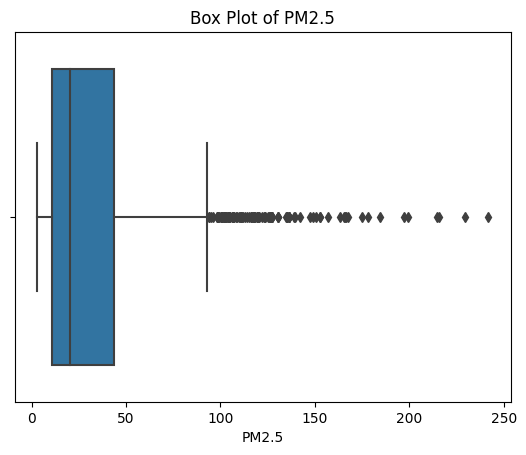

In [49]:
# Example: Box plot for PM2.5
sns.boxplot(x='PM2.5', data=ds)
plt.title('Box Plot of PM2.5')
plt.show()


In [ ]:
# Example: Scatter plot between PM2.5 and NO2
sns.scatterplot(x='PM2.5', y='NO2', data=ds)
plt.title('Scatter Plot of PM2.5 vs. NO2')
plt.xlabel('PM2.5')
plt.ylabel('NO2')
plt.show()

In [ ]:
# Example: Scatter plot between PM2.5 and SO2
sns.scatterplot(x='PM2.5', y='SO2', data=ds)
plt.title('Scatter Plot of PM2.5 vs. SO2')
plt.xlabel('PM2.5')
plt.ylabel('SO2')
plt.show()

In [ ]:
# Example: Scatter plot between PM2.5 and CO
sns.scatterplot(x='PM2.5', y='CO', data=ds)
plt.title('Scatter Plot of PM2.5 vs. CO')
plt.xlabel('PM2.5')
plt.ylabel('CO')
plt.show()

C:\Users\Sagat\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Sagat\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Sagat\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

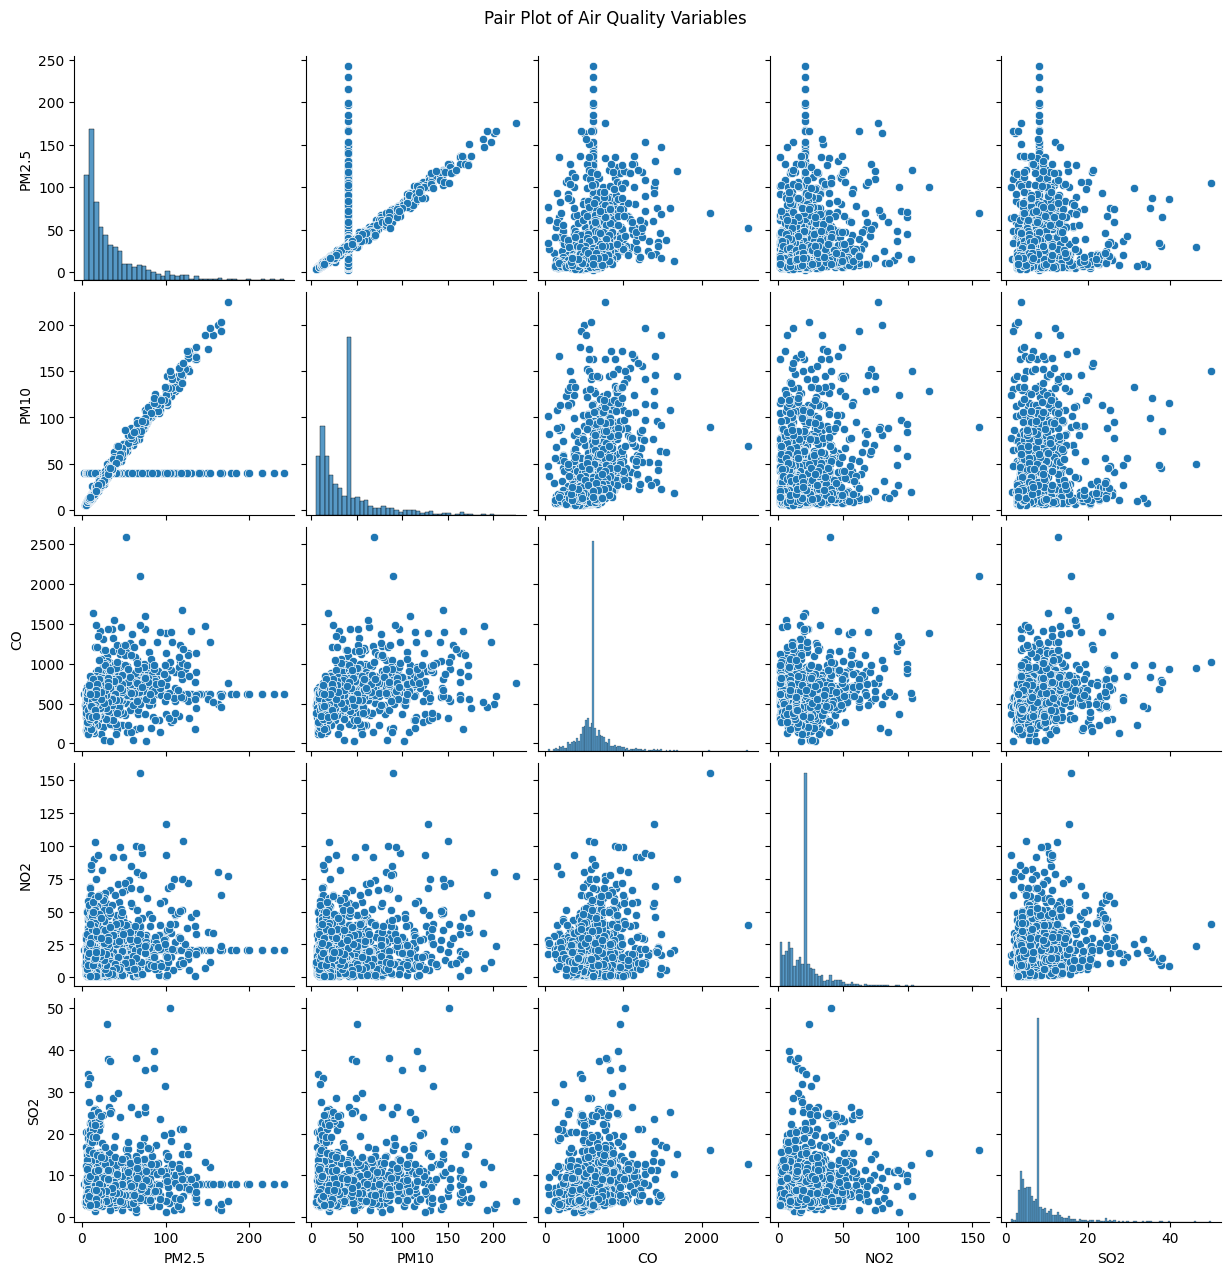

In [10]:
# Example: Pair plot for selected air quality variables
sns.pairplot(ds[['PM2.5', 'PM10', 'CO', 'NO2', 'SO2']])
plt.suptitle('Pair Plot of Air Quality Variables', y=1.02)
plt.show()


Time Series Plots

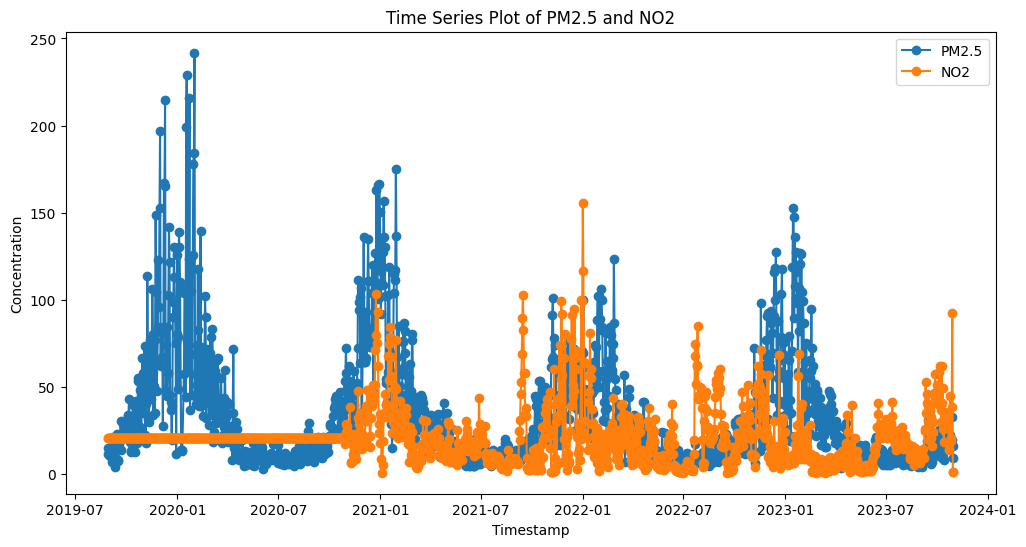

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(ds['Timestamp'], ds['PM2.5'], label='PM2.5', marker='o')
plt.plot(ds['Timestamp'], ds['NO2'], label='NO2', marker='o')
plt.title('Time Series Plot of PM2.5 and NO2')
plt.xlabel('Timestamp')
plt.ylabel('Concentration')
plt.legend()
plt.show()


In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(ds['Timestamp'], ds['PM2.5'], label='PM2.5', marker='o')
plt.plot(ds['Timestamp'], ds['SO2'], label='SO2', marker='o')
plt.title('Time Series Plot of PM2.5 and SO2')
plt.xlabel('Timestamp')
plt.ylabel('Concentration')
plt.legend()
plt.show()


In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(ds['Timestamp'], ds['PM2.5'], label='PM2.5', marker='o')
plt.plot(ds['Timestamp'], ds['CO'], label='CO', marker='o')
plt.title('Time Series Plot of PM2.5 and CO')
plt.xlabel('Timestamp')
plt.ylabel('Concentration')
plt.legend()
plt.show()


Feature selection

In [18]:
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
# Example for one-hot encoding
merged_df = pd.get_dummies(merged_df, columns=['DD', 'WW'])


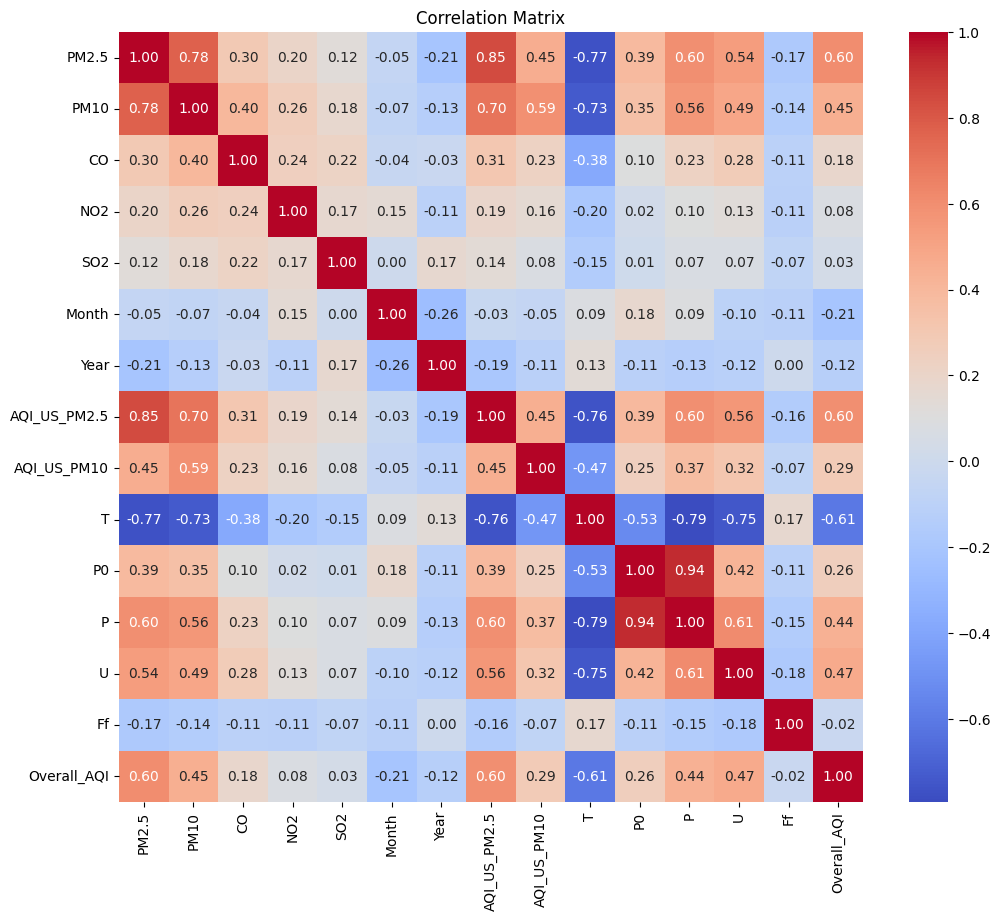

In [20]:
# Select only the numerical columns
numerical_columns = merged_df.select_dtypes(include=['float64', 'int32']).columns

# Calculate the correlation matrix
correlation_matrix = merged_df[numerical_columns].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


C:\Users\Sagat\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Sagat\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Sagat\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

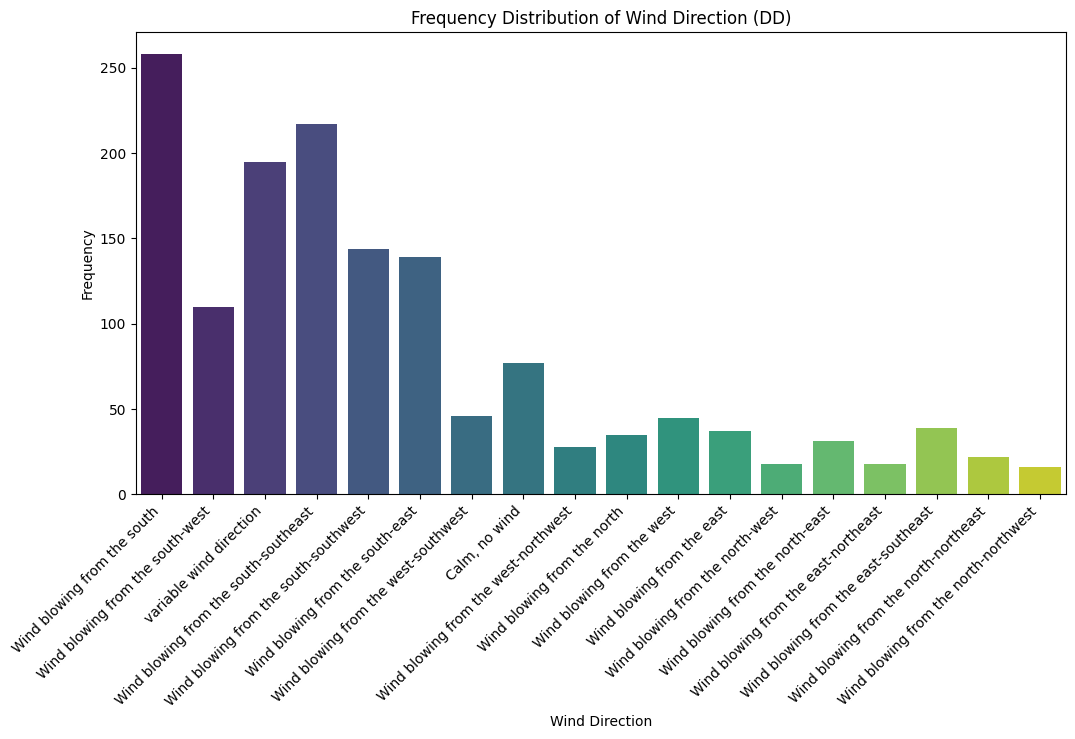

C:\Users\Sagat\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Sagat\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Sagat\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

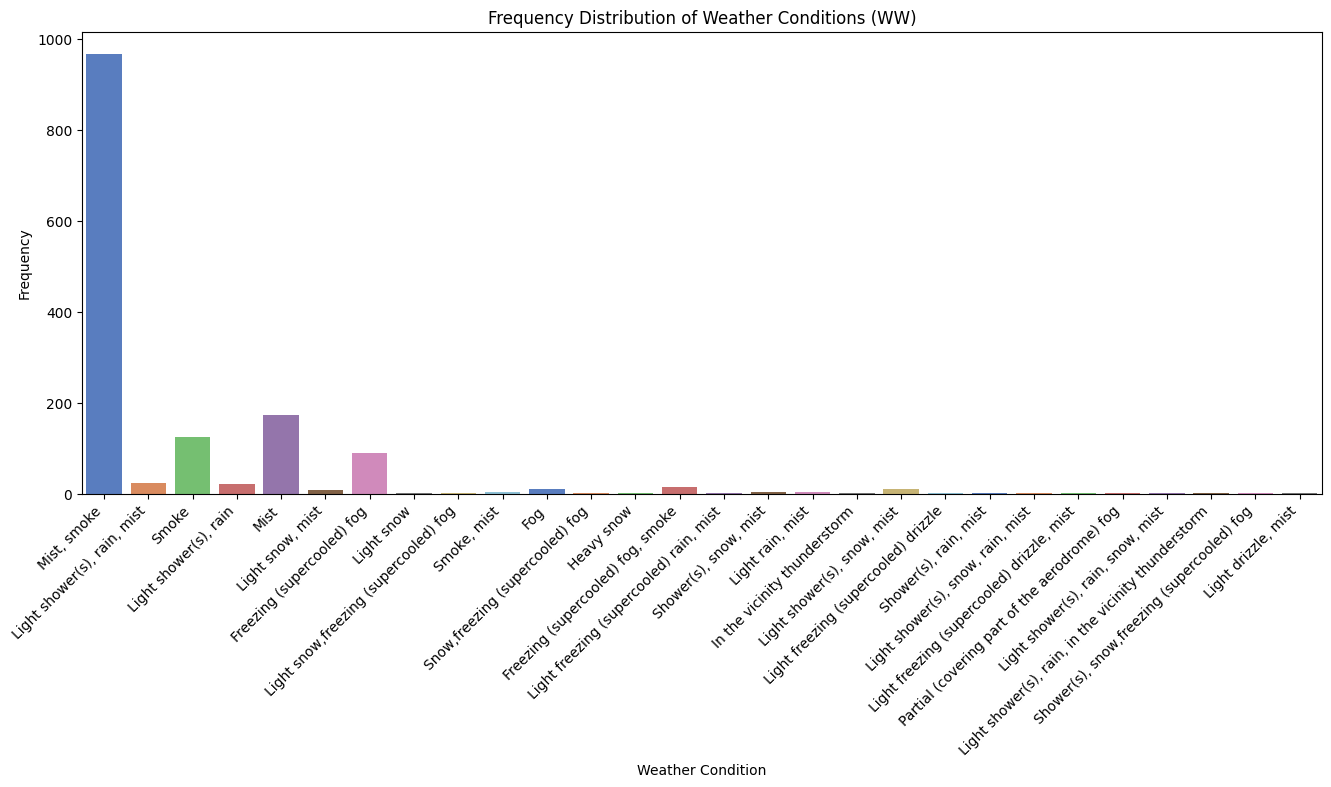

In [29]:
# Example: Bar chart for 'DD' (wind direction)
plt.figure(figsize=(12, 6))
sns.countplot(x='DD', data=merged_df, palette='viridis')
plt.title('Frequency Distribution of Wind Direction (DD)')
plt.xlabel('Wind Direction')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

# Example: Bar chart for 'WW' (weather condition)
plt.figure(figsize=(16, 6))
sns.countplot(x='WW', data=merged_df, palette='muted')
plt.title('Frequency Distribution of Weather Conditions (WW)')
plt.xlabel('Weather Condition')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()


In [ ]:
print(merged_df.columns)

C:\Users\Sagat\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Sagat\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Sagat\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

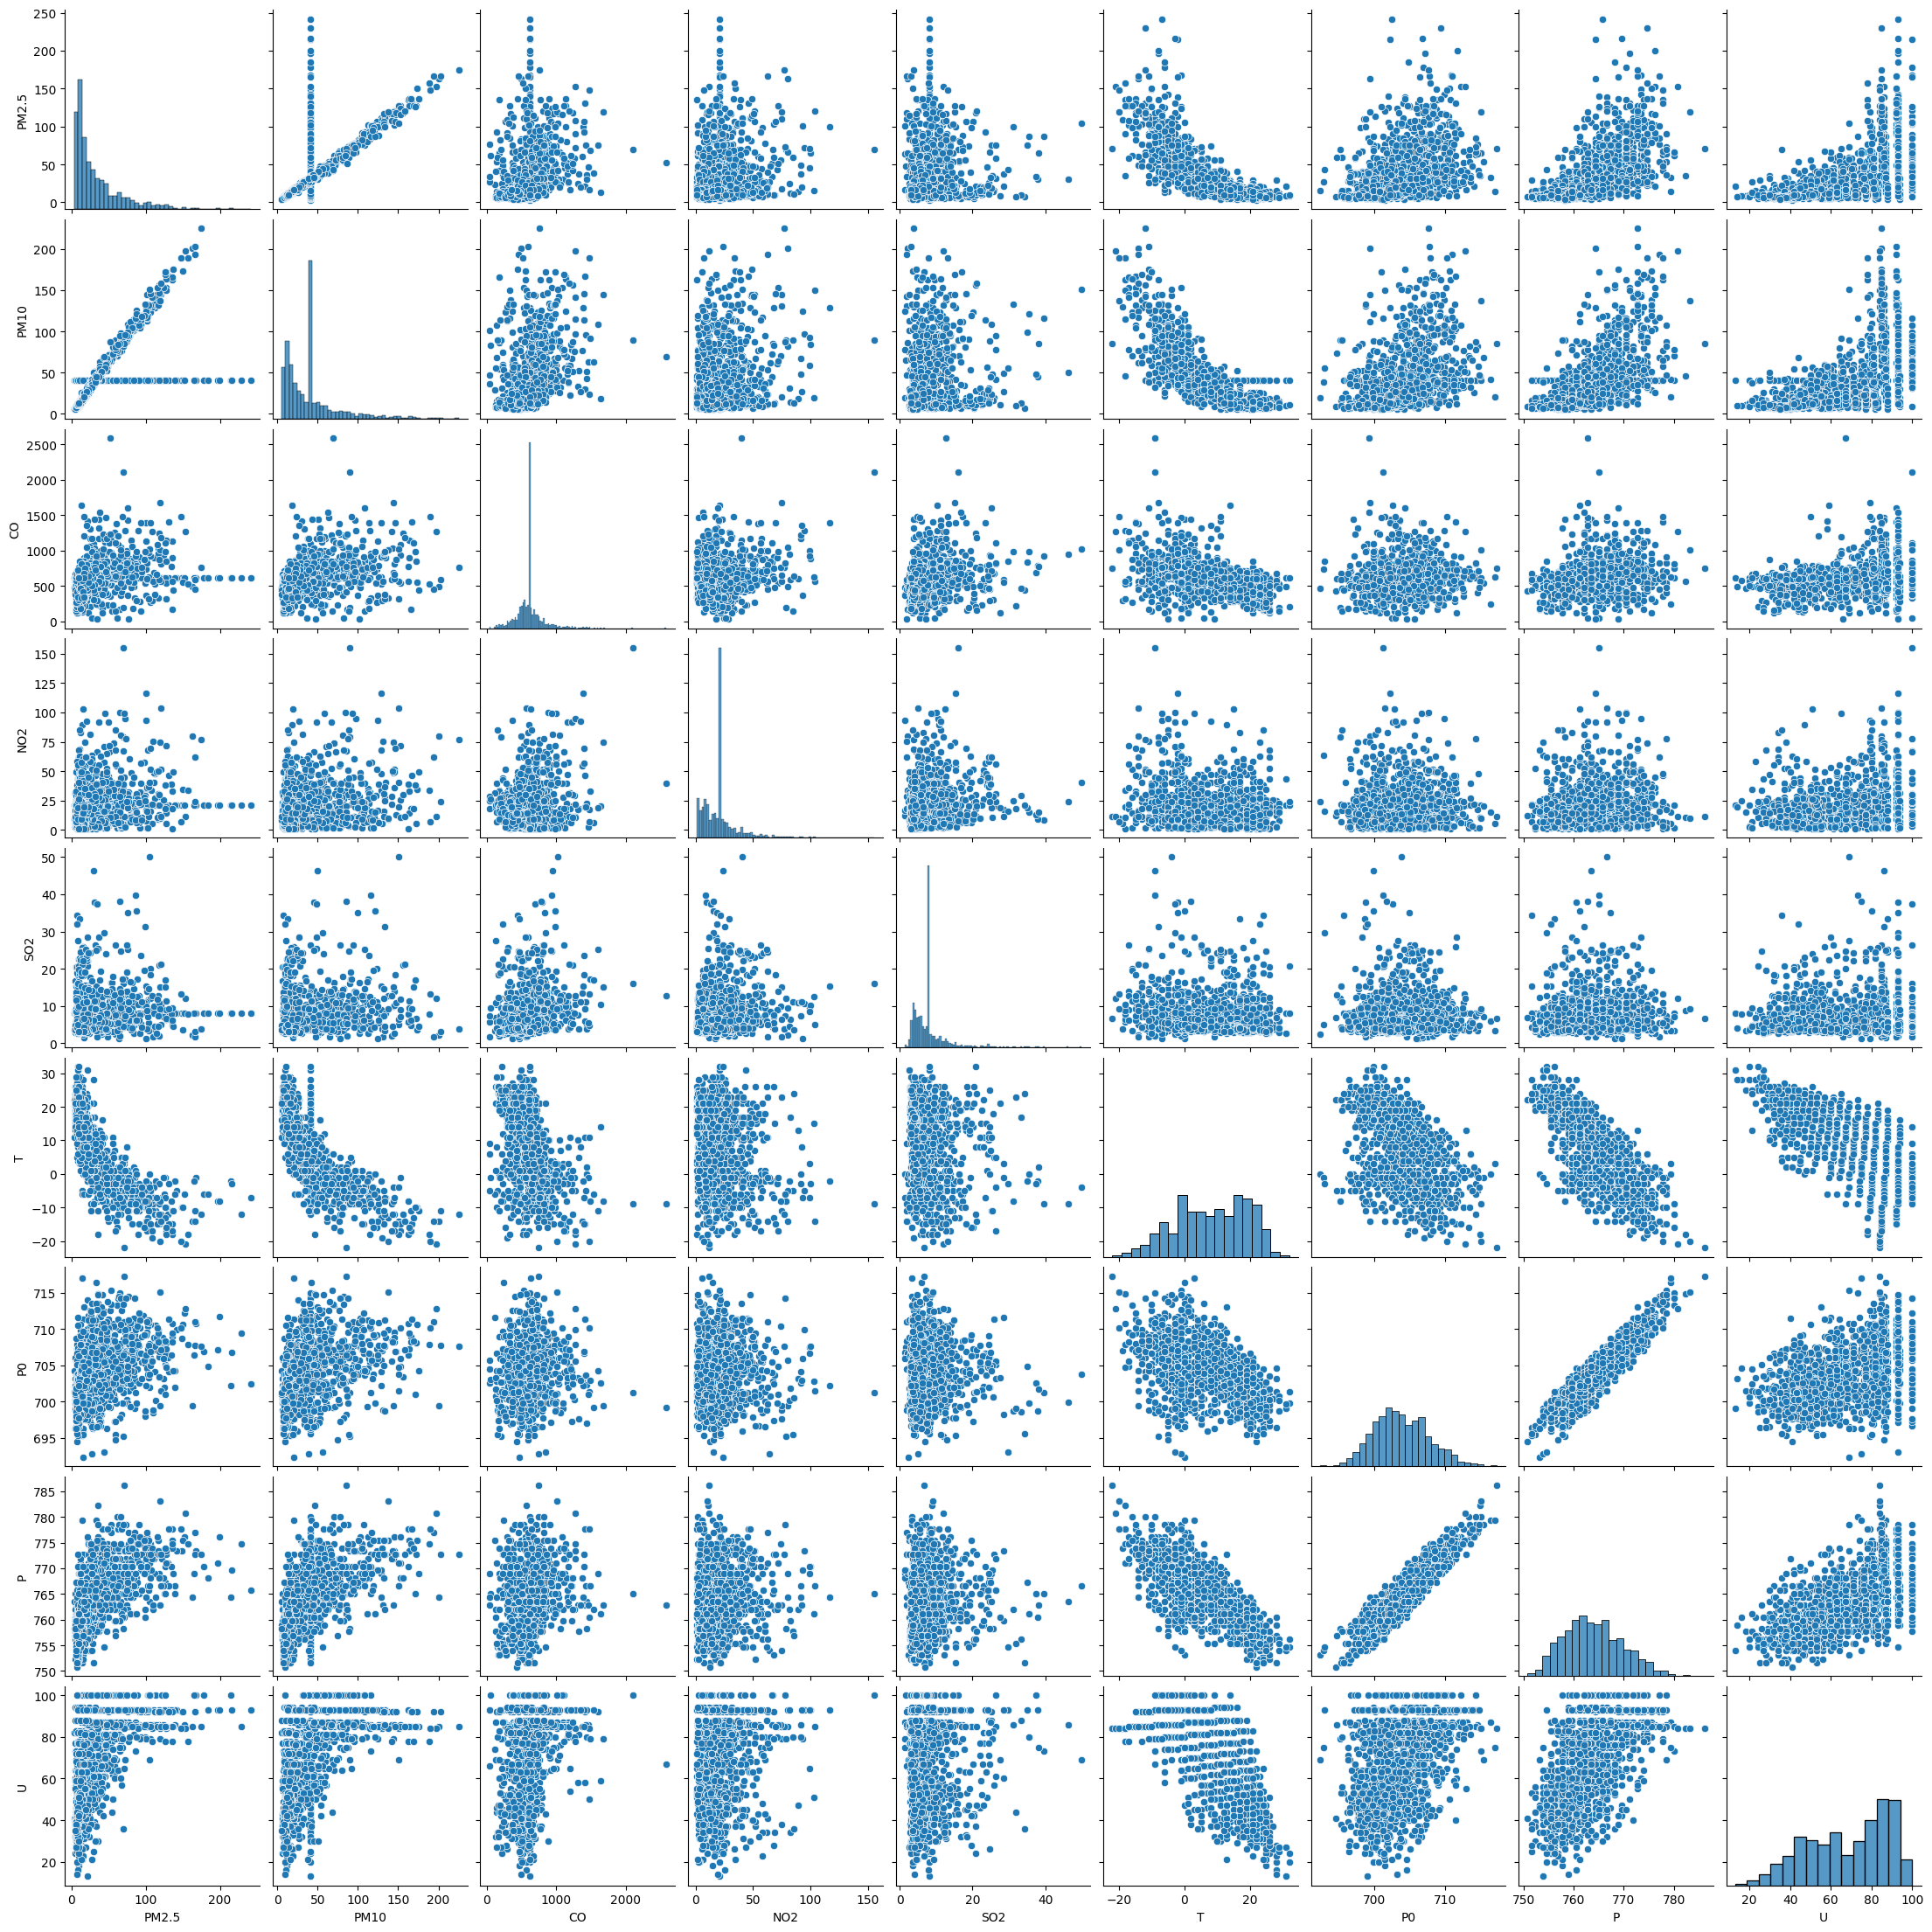

In [30]:
numerical_vars = ['PM2.5', 'PM10', 'CO', 'NO2', 'SO2', 'T', 'P0', 'P', 'U']
sns.pairplot(merged_df[numerical_vars])
plt.show()


Min-Max scaling (Normalization)

In [19]:
from sklearn.preprocessing import MinMaxScaler

# Assuming your dataset is loaded into a DataFrame called 'merged_df'
numerical_columns = ['PM2.5', 'PM10', 'CO', 'NO2', 'SO2', 'T', 'P0', 'P', 'U']

# Min-Max Scaling (Normalization)
scaler_minmax = MinMaxScaler()
merged_df_normalized2 = merged_df.copy()
merged_df_normalized2[numerical_columns] = scaler_minmax.fit_transform(merged_df[numerical_columns])

In [34]:
print(merged_df_normalized2.describe())

             PM2.5         PM10           CO          NO2          SO2  \
count  1475.000000  1475.000000  1475.000000  1475.000000  1475.000000   
mean      0.128891     0.161386     0.227287     0.128859     0.138572   
std       0.141268     0.150457     0.083175     0.102381     0.102181   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.031872     0.049975     0.191479     0.059829     0.075770   
50%       0.073041     0.160880     0.227562     0.128632     0.137761   
75%       0.172844     0.175538     0.242529     0.138177     0.137761   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

             Month         Year  AQI_US_PM2.5  AQI_US_PM10            T  \
count  1475.000000  1475.000000   1475.000000  1475.000000  1475.000000   
mean      6.675254  2021.236610     87.235482    36.461640     0.560640   
std       3.437506     1.255766     56.207346    39.127083     0.201498   
min       1.000000  2019.000000  

In [ ]:
merged_df_normalized2.to_csv('normalized_data.csv', index=False)

<Figure size 2000x2000 with 0 Axes>

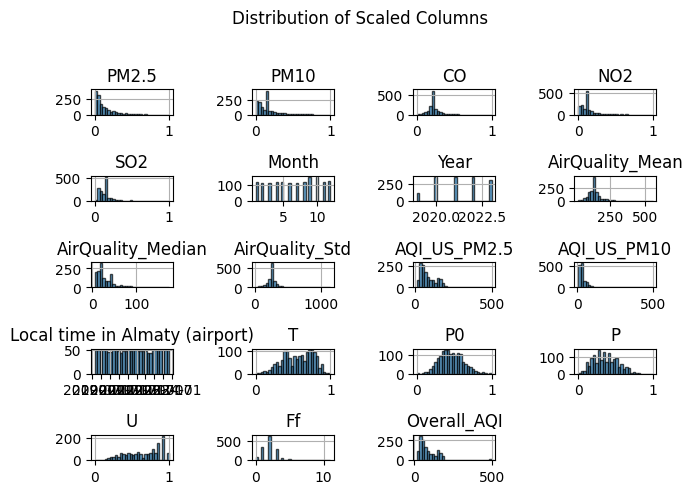

In [32]:
plt.figure(figsize=(20, 20))
merged_df_normalized2.hist(bins=30, edgecolor='black', alpha=0.7)
plt.suptitle('Distribution of Scaled Columns', y=1.02)
plt.tight_layout() 
plt.show()

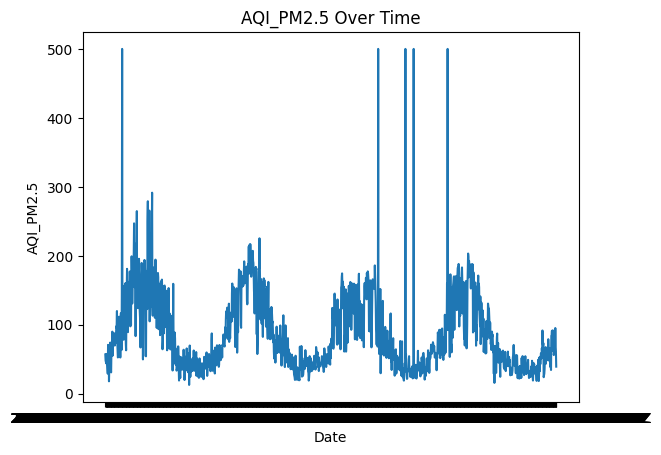

In [22]:
plt.plot(merged_df_normalized2['Timestamp(UTC)'], merged_df_normalized2['AQI_US_PM2.5'])
plt.xlabel('Date')
plt.ylabel('AQI_PM2.5')
plt.title('AQI_PM2.5 Over Time')
plt.show()

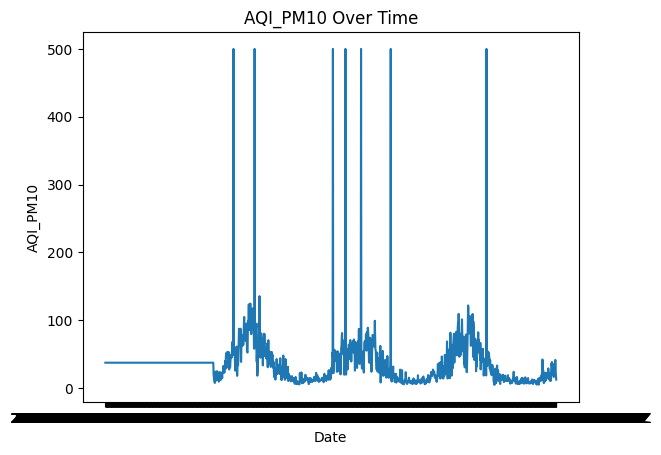

In [23]:
plt.plot(merged_df_normalized2['Timestamp(UTC)'], merged_df_normalized2['AQI_US_PM10'])
plt.xlabel('Date')
plt.ylabel('AQI_PM10')
plt.title('AQI_PM10 Over Time')
plt.show()


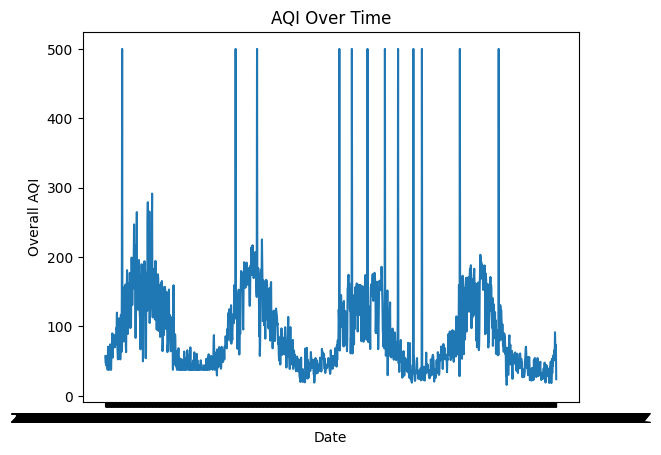

In [24]:
plt.plot(merged_df_normalized2['Timestamp(UTC)'], merged_df_normalized2['Overall_AQI'])
plt.xlabel('Date')
plt.ylabel('Overall AQI')
plt.title('AQI Over Time')
plt.show()


In [56]:
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

features = merged_df[['PM2.5', 'PM10', 'CO', 'NO2', 'SO2', 'T', 'P0', 'P', 'U', 'Month', 'Year', 'Ff']]
target_pm25 = merged_df['AQI_PM2.5']
target_pm10 = merged_df['AQI_PM10']
target_co = merged_df['AQI_CO']
target_no2 = merged_df['AQI_NO2']
target_so2 = merged_df['AQI_SO2']



# Split the data into training and testing sets
X_train, X_test, y_train_pm25, y_test_pm25 = train_test_split(features, target_pm25, test_size=0.2, random_state=42)
X_train, X_test, y_train_pm10, y_test_pm10 = train_test_split(features, target_pm10, test_size=0.2, random_state=42)
X_train, X_test, y_train_co, y_test_co = train_test_split(features, target_co, test_size=0.2, random_state=42)
X_train, X_test, y_train_no2, y_test_no2 = train_test_split(features, target_no2, test_size=0.2, random_state=42)
X_train, X_test, y_train_so2, y_test_so2 = train_test_split(features, target_so2, test_size=0.2, random_state=42)


# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Use LassoCV for feature selection
lasso_pm25 = LassoCV(cv=5)
lasso_pm25.fit(X_train_scaled, y_train_pm25)

lasso_pm10 = LassoCV(cv=5)
lasso_pm10.fit(X_train_scaled, y_train_pm10)

lasso_co = LassoCV(cv=5)
lasso_co.fit(X_train_scaled, y_train_co)

lasso_no2 = LassoCV(cv=5)
lasso_no2.fit(X_train_scaled, y_train_no2)

lasso_so2 = LassoCV(cv=5)
lasso_so2.fit(X_train_scaled, y_train_so2)


# Get selected features
selected_features_pm25 = features.columns[lasso_pm25.coef_ != 0]
selected_features_pm10 = features.columns[lasso_pm10.coef_ != 0]
selected_features_co = features.columns[lasso_co.coef_ != 0]
selected_features_no2 = features.columns[lasso_no2.coef_ != 0]
selected_features_so2 = features.columns[lasso_so2.coef_ != 0]

# Print selected features
print("Selected Features for AQI_PM2.5:", selected_features_pm25)
print("Selected Features for AQI_PM10:", selected_features_pm10)
print("Selected Features for AQI_CO:", selected_features_co)
print("Selected Features for AQI_NO2:", selected_features_no2)
print("Selected Features for AQI_SO2:", selected_features_so2)


C:\Users\Sagat\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 316.5033083909657, tolerance: 314.3114744253558
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Sagat\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2293.7142649870366, tolerance: 157.22005772969231
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Sagat\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWar

Selected Features for AQI_PM2.5: Index(['PM2.5', 'PM10', 'CO', 'NO2', 'SO2', 'T', 'P', 'U', 'Month', 'Year',
       'Ff'],
      dtype='object')
Selected Features for AQI_PM10: Index(['PM2.5', 'PM10', 'NO2', 'SO2', 'T', 'P0', 'U', 'Month', 'Year', 'Ff'], dtype='object')
Selected Features for AQI_CO: Index(['CO'], dtype='object')
Selected Features for AQI_NO2: Index(['PM2.5', 'PM10', 'CO', 'NO2', 'SO2', 'T', 'P0', 'P', 'U', 'Month',
       'Year', 'Ff'],
      dtype='object')
Selected Features for AQI_SO2: Index(['PM2.5', 'PM10', 'CO', 'NO2', 'SO2', 'T', 'P0', 'P', 'U', 'Month',
       'Year', 'Ff'],
      dtype='object')


Feature selection using LASO

In [25]:
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

features = merged_df_normalized2[['PM2.5', 'PM10', 'CO', 'NO2', 'SO2', 'T', 'P0', 'P', 'U', 'Month', 'Year', 'Ff']]
target_aqipm25 = merged_df_normalized2['AQI_US_PM2.5']
target_aqipm10 = merged_df_normalized2['AQI_US_PM10']
target_pm25 = merged_df_normalized2['PM2.5']
target_pm10 = merged_df_normalized2['PM10']
#target_so2 = merged_df_normalized2['AQI_SO2']



# Split the data into training and testing sets
X_train, X_test, y_train_aqipm25, y_test_aqipm25 = train_test_split(features, target_aqipm25, test_size=0.2, random_state=42)
X_train, X_test, y_train_aqipm10, y_test_aqipm10 = train_test_split(features, target_aqipm10, test_size=0.2, random_state=42)
X_train, X_test, y_train_pm25, y_test_pm25 = train_test_split(features, target_pm25, test_size=0.2, random_state=42)
X_train, X_test, y_train_pm10, y_test_pm10 = train_test_split(features, target_pm10, test_size=0.2, random_state=42)

#X_train, X_test, y_train_co, y_test_co = train_test_split(features, target_co, test_size=0.2, random_state=42)
#X_train, X_test, y_train_no2, y_test_no2 = train_test_split(features, target_no2, test_size=0.2, random_state=42)
#X_train, X_test, y_train_so2, y_test_so2 = train_test_split(features, target_so2, test_size=0.2, random_state=42)


# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Use LassoCV for feature selection
lasso_aqipm25 = LassoCV(cv=5)
lasso_aqipm25.fit(X_train_scaled, y_train_aqipm25)

lasso_aqipm10 = LassoCV(cv=5)
lasso_aqipm10.fit(X_train_scaled, y_train_aqipm10)

lasso_pm25 = LassoCV(cv=5)
lasso_pm25.fit(X_train_scaled, y_train_pm25)

lasso_pm10 = LassoCV(cv=5)
lasso_pm10.fit(X_train_scaled, y_train_pm10)
#lasso_co = LassoCV(cv=5)
#lasso_co.fit(X_train_scaled, y_train_co)

#lasso_no2 = LassoCV(cv=5)
#lasso_no2.fit(X_train_scaled, y_train_no2)

#lasso_so2 = LassoCV(cv=5)
#lasso_so2.fit(X_train_scaled, y_train_so2)


# Get selected features
selected_features_pm25 = features.columns[lasso_pm25.coef_ != 0]
selected_features_pm10 = features.columns[lasso_pm10.coef_ != 0]
selected_features_aqipm25 = features.columns[lasso_aqipm25.coef_ != 0]
selected_features_aqipm10 = features.columns[lasso_aqipm10.coef_ != 0]
#selected_features_co = features.columns[lasso_co.coef_ != 0]
#selected_features_no2 = features.columns[lasso_no2.coef_ != 0]
#selected_features_so2 = features.columns[lasso_so2.coef_ != 0]

# Print selected features
print("Selected Features for AQI_PM2.5:", selected_features_aqipm25)
print("Selected Features for AQI_PM10:", selected_features_aqipm10)
print("Selected Features for PM2.5:", selected_features_pm25)
print("Selected Features for PM10:", selected_features_pm10)
#print("Selected Features for AQI_CO:", selected_features_co)
#print("Selected Features for AQI_NO2:", selected_features_no2)
#print("Selected Features for AQI_SO2:", selected_features_so2)


Selected Features for AQI_PM2.5: Index(['PM2.5', 'PM10', 'CO', 'SO2', 'T', 'U', 'Year'], dtype='object')
Selected Features for AQI_PM10: Index(['PM10', 'T', 'P'], dtype='object')
Selected Features for PM2.5: Index(['PM2.5'], dtype='object')
Selected Features for PM10: Index(['PM10'], dtype='object')


C:\Users\Sagat\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1270.2748797151726, tolerance: 157.8000011043223
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Sagat\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9867.188414824894, tolerance: 157.8000011043223
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Sagat\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarn

In [26]:
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

features = merged_df_normalized2[['PM2.5', 'PM10', 'CO', 'NO2', 'SO2', 'T', 'P0', 'P', 'U', 'Month', 'Year', 'Ff', 'AQI_US_PM2.5', 'AQI_US_PM10']]
target_aqi = merged_df_normalized2['Overall_AQI']


# Split the data into training and testing sets
X_train, X_test, y_train_aqi, y_test_aqi = train_test_split(features, target_aqi, test_size=0.2, random_state=42)



# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Use LassoCV for feature selection
lasso_aqi = LassoCV(cv=5)
lasso_aqi.fit(X_train_scaled, y_train_aqi)


# Get selected features
selected_features_aqi = features.columns[lasso_aqi.coef_ != 0]

# Print selected features
print("Selected Features for AQI:", selected_features_aqi)

Selected Features for AQI: Index(['PM2.5', 'PM10', 'CO', 'NO2', 'SO2', 'T', 'P0', 'U', 'Month', 'Year',
       'Ff', 'AQI_US_PM2.5', 'AQI_US_PM10'],
      dtype='object')


Cross-validation

In [27]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from statsmodels.tsa.arima.model import ARIMA

In [36]:
import numpy as np

In [28]:
features = merged_df_normalized2[['PM2.5', 'PM10', 'CO', 'NO2', 'SO2', 'T', 'P0', 'U', 'Month', 'Year',
       'Ff', 'AQI_US_PM2.5', 'AQI_US_PM10']]
target = merged_df_normalized2['Overall_AQI']

# Linear Regression
linear_reg = LinearRegression()
linear_reg_scores = cross_val_score(linear_reg, features, target, scoring='neg_mean_squared_error', cv=5)
linear_reg_rmse = np.sqrt(-linear_reg_scores.mean())

# Random Forest Regressor
random_forest_reg = RandomForestRegressor()
random_forest_scores = cross_val_score(random_forest_reg, features, target, scoring='neg_mean_squared_error', cv=5)
random_forest_rmse = np.sqrt(-random_forest_scores.mean())

# K-Nearest Neighbors (KNN) Regressor
knn_reg = KNeighborsRegressor()
knn_scores = cross_val_score(knn_reg, features, target, scoring='neg_mean_squared_error', cv=5)
knn_rmse = np.sqrt(-knn_scores.mean())

# Support Vector Regression (SVR)
svr_reg = SVR()
svr_scores = cross_val_score(svr_reg, features, target, scoring='neg_mean_squared_error', cv=5)
svr_rmse = np.sqrt(-svr_scores.mean())

# ARIMA Model
# Note: ARIMA requires a time series data structure, and its implementation may vary based on the library used.
# You need to adapt this part based on your specific data and ARIMA library.

# Display the results
print(f'Linear Regression RMSE: {linear_reg_rmse}')
print(f'Random Forest Regressor RMSE: {random_forest_rmse}')
print(f'K-Nearest Neighbors (KNN) Regressor RMSE: {knn_rmse}')
print(f'Support Vector Regression (SVR) RMSE: {svr_rmse}')

Linear Regression RMSE: 50.96934508516229
Random Forest Regressor RMSE: 55.96335222620634
K-Nearest Neighbors (KNN) Regressor RMSE: 56.56167185014555
Support Vector Regression (SVR) RMSE: 66.0498260715088


In [29]:
features = merged_df_normalized2[['PM2.5', 'PM10', 'CO', 'SO2', 'T', 'U', 'Year']]
target = merged_df_normalized2['AQI_US_PM2.5']

# Linear Regression
linear_reg = LinearRegression()
linear_reg_scores = cross_val_score(linear_reg, features, target, scoring='neg_mean_squared_error', cv=5)
linear_reg_rmse = np.sqrt(-linear_reg_scores.mean())

# Random Forest Regressor
random_forest_reg = RandomForestRegressor()
random_forest_scores = cross_val_score(random_forest_reg, features, target, scoring='neg_mean_squared_error', cv=5)
random_forest_rmse = np.sqrt(-random_forest_scores.mean())

# K-Nearest Neighbors (KNN) Regressor
knn_reg = KNeighborsRegressor()
knn_scores = cross_val_score(knn_reg, features, target, scoring='neg_mean_squared_error', cv=5)
knn_rmse = np.sqrt(-knn_scores.mean())

# Support Vector Regression (SVR)
svr_reg = SVR()
svr_scores = cross_val_score(svr_reg, features, target, scoring='neg_mean_squared_error', cv=5)
svr_rmse = np.sqrt(-svr_scores.mean())

# ARIMA Model
# Note: ARIMA requires a time series data structure, and its implementation may vary based on the library used.
# You need to adapt this part based on your specific data and ARIMA library.

# Display the results
print(f'Linear Regression RMSE: {linear_reg_rmse}')
print(f'Random Forest Regressor RMSE: {random_forest_rmse}')
print(f'K-Nearest Neighbors (KNN) Regressor RMSE: {knn_rmse}')
print(f'Support Vector Regression (SVR) RMSE: {svr_rmse}')

Linear Regression RMSE: 29.774396219261135
Random Forest Regressor RMSE: 25.827811038098066
K-Nearest Neighbors (KNN) Regressor RMSE: 39.93966589794077
Support Vector Regression (SVR) RMSE: 59.88081577489266


In [28]:
features = merged_df_normalized2[['PM10', 'T', 'P']]
target = merged_df_normalized2['AQI_US_PM10']

# Linear Regression
linear_reg = LinearRegression()
linear_reg_scores = cross_val_score(linear_reg, features, target, scoring='neg_mean_squared_error', cv=5)
linear_reg_rmse = np.sqrt(-linear_reg_scores.mean())

# Random Forest Regressor
random_forest_reg = RandomForestRegressor()
random_forest_scores = cross_val_score(random_forest_reg, features, target, scoring='neg_mean_squared_error', cv=5)
random_forest_rmse = np.sqrt(-random_forest_scores.mean())

# K-Nearest Neighbors (KNN) Regressor
knn_reg = KNeighborsRegressor()
knn_scores = cross_val_score(knn_reg, features, target, scoring='neg_mean_squared_error', cv=5)
knn_rmse = np.sqrt(-knn_scores.mean())

# Support Vector Regression (SVR)
svr_reg = SVR()
svr_scores = cross_val_score(svr_reg, features, target, scoring='neg_mean_squared_error', cv=5)
svr_rmse = np.sqrt(-svr_scores.mean())

# ARIMA Model
# Note: ARIMA requires a time series data structure, and its implementation may vary based on the library used.
# You need to adapt this part based on your specific data and ARIMA library.

# Display the results
print(f'Linear Regression RMSE: {linear_reg_rmse}')
print(f'Random Forest Regressor RMSE: {random_forest_rmse}')
print(f'K-Nearest Neighbors (KNN) Regressor RMSE: {knn_rmse}')
print(f'Support Vector Regression (SVR) RMSE: {svr_rmse}')

Linear Regression RMSE: 31.695322310683864
Random Forest Regressor RMSE: 10.727242030243707
K-Nearest Neighbors (KNN) Regressor RMSE: 33.61986188435293
Support Vector Regression (SVR) RMSE: 31.72466698213657


In [30]:
features = merged_df_normalized2[['PM2.5']]
target = merged_df_normalized2['PM2.5']

# Linear Regression
linear_reg = LinearRegression()
linear_reg_scores = cross_val_score(linear_reg, features, target, scoring='neg_mean_squared_error', cv=5)
linear_reg_rmse = np.sqrt(-linear_reg_scores.mean())

# Random Forest Regressor
random_forest_reg = RandomForestRegressor()
random_forest_scores = cross_val_score(random_forest_reg, features, target, scoring='neg_mean_squared_error', cv=5)
random_forest_rmse = np.sqrt(-random_forest_scores.mean())

# K-Nearest Neighbors (KNN) Regressor
knn_reg = KNeighborsRegressor()
knn_scores = cross_val_score(knn_reg, features, target, scoring='neg_mean_squared_error', cv=5)
knn_rmse = np.sqrt(-knn_scores.mean())

# Support Vector Regression (SVR)
svr_reg = SVR()
svr_scores = cross_val_score(svr_reg, features, target, scoring='neg_mean_squared_error', cv=5)
svr_rmse = np.sqrt(-svr_scores.mean())

# ARIMA Model
# Note: ARIMA requires a time series data structure, and its implementation may vary based on the library used.
# You need to adapt this part based on your specific data and ARIMA library.

# Display the results
print(f'Linear Regression RMSE: {linear_reg_rmse}')
print(f'Random Forest Regressor RMSE: {random_forest_rmse}')
print(f'K-Nearest Neighbors (KNN) Regressor RMSE: {knn_rmse}')
print(f'Support Vector Regression (SVR) RMSE: {svr_rmse}')

Linear Regression RMSE: 5.305591606903296e-17
Random Forest Regressor RMSE: 0.012856973164775798
K-Nearest Neighbors (KNN) Regressor RMSE: 0.014506066186925725
Support Vector Regression (SVR) RMSE: 0.08597541065919491


In [31]:
features = merged_df_normalized2[['PM10']]
target = merged_df_normalized2['PM10']

# Linear Regression
linear_reg = LinearRegression()
linear_reg_scores = cross_val_score(linear_reg, features, target, scoring='neg_mean_squared_error', cv=5)
linear_reg_rmse = np.sqrt(-linear_reg_scores.mean())

# Random Forest Regressor
random_forest_reg = RandomForestRegressor()
random_forest_scores = cross_val_score(random_forest_reg, features, target, scoring='neg_mean_squared_error', cv=5)
random_forest_rmse = np.sqrt(-random_forest_scores.mean())

# K-Nearest Neighbors (KNN) Regressor
knn_reg = KNeighborsRegressor()
knn_scores = cross_val_score(knn_reg, features, target, scoring='neg_mean_squared_error', cv=5)
knn_rmse = np.sqrt(-knn_scores.mean())

# Support Vector Regression (SVR)
svr_reg = SVR()
svr_scores = cross_val_score(svr_reg, features, target, scoring='neg_mean_squared_error', cv=5)
svr_rmse = np.sqrt(-svr_scores.mean())

# ARIMA Model
# Note: ARIMA requires a time series data structure, and its implementation may vary based on the library used.
# You need to adapt this part based on your specific data and ARIMA library.

# Display the results
print(f'Linear Regression RMSE: {linear_reg_rmse}')
print(f'Random Forest Regressor RMSE: {random_forest_rmse}')
print(f'K-Nearest Neighbors (KNN) Regressor RMSE: {knn_rmse}')
print(f'Support Vector Regression (SVR) RMSE: {svr_rmse}')

Linear Regression RMSE: 7.259237607670277e-17
Random Forest Regressor RMSE: 0.0041018225984185055
K-Nearest Neighbors (KNN) Regressor RMSE: 0.006985653023138837
Support Vector Regression (SVR) RMSE: 0.08499407185187942


In [31]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(merged_df_normalized2['AQI_US_PM2.5'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))


ADF Statistic: -2.532118
p-value: 0.107854
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568


In [32]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(merged_df_normalized2['AQI_US_PM10'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))


ADF Statistic: -3.562702
p-value: 0.006515
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568


In [32]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(merged_df_normalized2['Overall_AQI'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))


ADF Statistic: -2.600306
p-value: 0.092934
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
from sklearn.preprocessing import StandardScaler

Outliers

In [99]:
from scipy.stats import zscore

z_scores = zscore(merged_df_normalized2['Overall_AQI'])
merged_df_normalized2_no_outliers = merged_df_normalized2[(z_scores < 3) & (z_scores > -3)]


In [107]:
from scipy.stats import zscore

z_scores = zscore(merged_df_normalized2['AQI_US_PM2.5'])
merged_df_normalized2_no_outliers2 = merged_df_normalized2[(z_scores < 3) & (z_scores > -3)]


In [119]:
from scipy.stats import zscore

z_scores = zscore(merged_df_normalized2['AQI_US_PM10'])
merged_df_normalized2_no_outliers3 = merged_df_normalized2[(z_scores < 3) & (z_scores > -3)]


In [88]:
merged_df_normalized2_no_outliers

Country          State    City            Timestamp(UTC)     PM2.5  \
0     Kazakhstan  Almaty Qalasy  Almaty  2019-08-29T00:00:00.000Z  0.049797   
1     Kazakhstan  Almaty Qalasy  Almaty  2019-08-30T00:00:00.000Z  0.035473   
2     Kazakhstan  Almaty Qalasy  Almaty  2019-08-31T00:00:00.000Z  0.033714   
3     Kazakhstan  Almaty Qalasy  Almaty  2019-09-01T00:00:00.000Z  0.031369   
4     Kazakhstan  Almaty Qalasy  Almaty  2019-09-02T00:00:00.000Z  0.051179   
...          ...            ...     ...                       ...       ...   
1470  Kazakhstan  Almaty Qalasy  Almaty  2023-10-27T00:00:00.000Z  0.057419   
1471  Kazakhstan  Almaty Qalasy  Almaty  2023-10-28T00:00:00.000Z  0.125979   
1472  Kazakhstan  Almaty Qalasy  Almaty  2023-10-29T00:00:00.000Z  0.070193   
1473  Kazakhstan  Almaty Qalasy  Almaty  2023-10-30T00:00:00.000Z  0.056414   
1474  Kazakhstan  Almaty Qalasy  Almaty  2023-10-31T00:00:00.000Z  0.026637   

          PM10        CO       NO2       SO2  Month  ...     P0         P  \
0     0.160880  0.227562  0.128632  0.137761      8  ...  0.308  0.172805   
1     0.160880  0.227562  0.128632  0.137761      8  ...  0.380  0.209632   
2     0.160880  0.227562  0.128632  0.137761      8  ...  0.356  0.232295   
3     0.160880  0.227562  0.128632  0.137761      9  ...  0.420  0.274788   
4     0.160880  0.227562  0.128632  0.137761      9  ...  0.412  0.274788   
...        ...       ...       ...       ...    ...  ...    ...       ...   
1470  0.087576  0.123436  0.118622  0.107187     10  ...  0.584  0.424929   
1471  0.181156  0.347211  0.243460  0.484600     10  ...  0.580  0.467422   
1472  0.098858  0.516086  0.593370  0.202875     10  ...  0.424  0.339943   
1473  0.071198  0.227562  0.001230  0.035524     10  ...  0.500  0.359773   
1474  0.038260  0.227562  0.000907  0.034292     10  ...  0.396  0.294618   

             U                                     DD   Ff           WW  \
0     0.379310            Wind blowing from the south  2.0  Mist, smoke   
1     0.298851       Wind blowing from the south-west  3.0  Mist, smoke   
2     0.528736            Wind blowing from the south  1.0  Mist, smoke   
3     0.379310                variable wind direction  1.0  Mist, smoke   
4     0.367816                variable wind direction  1.0  Mist, smoke   
...        ...                                    ...  ...          ...   
1470  0.620690                variable wind direction  1.0         Mist   
1471  0.850575  Wind blowing from the north-northeast  2.0  Mist, smoke   
1472  0.919540            Wind blowing from the south  1.0         Mist   
1473  0.620690                          Calm, no wind  0.0  Mist, smoke   
1474  0.678161                          Calm, no wind  0.0  Mist, smoke   

                                                      c             VV   Td  \
0     Few clouds (10-30%) 3000 m, scattered clouds (...  10.0 and more  9.0   
1                      Scattered clouds (40-50%) 3000 m  10.0 and more  9.0   
2                      Scattered clouds (40-50%) 3000 m  10.0 and more  9.0   
3     Scattered clouds (40-50%) 1500 m, cumulonimbus...  10.0 and more  6.0   
4     Scattered clouds (40-50%) 1500 m, cumulonimbus...  10.0 and more  5.0   
...                                                 ...            ...  ...   
1470  Broken clouds (60-90%) 1500 m, cumulonimbus cl...            5.0  8.0   
1471                              Overcast (100%) 270 m  10.0 and more  5.0   
1472  Few clouds (10-30%) 3000 m, scattered clouds (...         02.àïð  7.0   
1473  Scattered clouds (40-50%) 1500 m, cumulonimbus...  10.0 and more  8.0   
1474                   Scattered clouds (40-50%) 3000 m         03.ìàé  7.0   

      Overall_AQI  
0       56.993562  
1       48.041667  
2       46.291667  
3       43.958333  
4       57.687554  
...           ...  
1470    91.693133  
1471    72.703004  
1472    69.758798  
1473    73.228755  
1474    23.958333  

[1468 rows x 25 columns]

Linear regression

Mean Squared Error: 2257.3790709252603
R-squared: 0.4021488138613333
Mean Absolute Error: 24.492657470391652
Mean Absolute Percentage Error: 0.3215066111516372


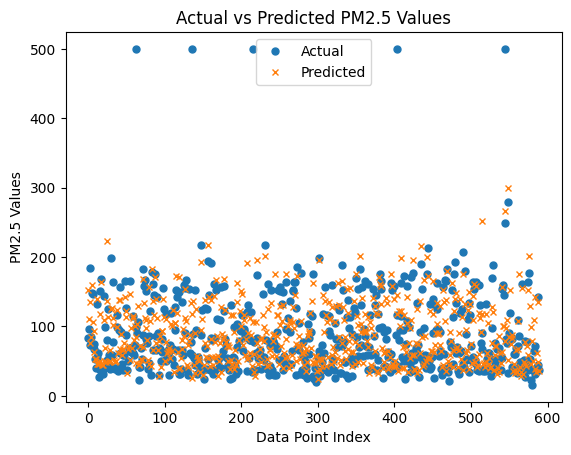

In [100]:
# Import necessary libraries
import numpy as np

# Select features (X) and target variable (y)
features = ['PM2.5', 'PM10', 'CO', 'NO2', 'SO2', 'T', 'P0', 'U', 'Month', 'Year', 'Ff', 'AQI_US_PM2.5', 'AQI_US_PM10']  # Add more features as needed

X = merged_df_normalized2[features]
y = merged_df_normalized2['Overall_AQI']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print(f'Mean Absolute Error: {mae}')
print(f'Mean Absolute Percentage Error: {mape}')
# Assuming 'y_test' is the actual values and 'y_pred' is the predicted values
# Make sure 'y_test' and 'y_pred' are NumPy arrays or Pandas Series for compatibility with 'np.linspace'

# Create a range of indices
indices = np.linspace(0, len(y_test) - 1, len(y_test))

# Plot actual values
plt.plot(indices, y_test, label='Actual', marker='o', linestyle='', markersize=5)

# Plot predicted values
plt.plot(indices, y_pred, label='Predicted', marker='x', linestyle='', markersize=5)

plt.xlabel('Data Point Index')
plt.ylabel('PM2.5 Values')
plt.title('Actual vs Predicted PM2.5 Values')
plt.legend()
plt.show()


Mean Squared Error: 2258.8863220951116
R-squared: 0.40174962884570575
Mean Absolute Error: 24.49532121618812
Mean Absolute Percentage Error: 0.3216429781321814


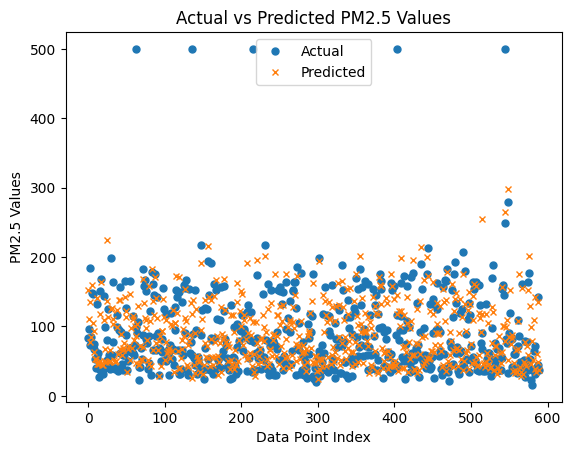

In [101]:
from sklearn.linear_model import Ridge
# Import necessary libraries
import numpy as np

# Select features (X) and target variable (y)
features = ['PM2.5', 'PM10', 'CO', 'NO2', 'SO2', 'T', 'P0', 'U', 'Month', 'Year', 'Ff', 'AQI_US_PM2.5', 'AQI_US_PM10']  # Add more features as needed
target_variable = 'Overall_AQI'  # Replace with the variable you want to predict

X = merged_df_normalized2[features]
y = merged_df_normalized2[target_variable]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Create a Ridge regression model
ridge_model = Ridge(alpha=0.1)  # You can adjust the alpha parameter

# Fit the model on the training data
ridge_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = ridge_model.predict(X_test)

# Evaluate the Ridge model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print(f'Mean Absolute Error: {mae}')
print(f'Mean Absolute Percentage Error: {mape}')

# Assuming 'y_test' is the actual values and 'y_pred' is the predicted values
# Make sure 'y_test' and 'y_pred' are NumPy arrays or Pandas Series for compatibility with 'np.linspace'

# Create a range of indices
indices = np.linspace(0, len(y_test) - 1, len(y_test))

# Plot actual values
plt.plot(indices, y_test, label='Actual', marker='o', linestyle='', markersize=5)

# Plot predicted values
plt.plot(indices, y_pred, label='Predicted', marker='x', linestyle='', markersize=5)

plt.xlabel('Data Point Index')
plt.ylabel('PM2.5 Values')
plt.title('Actual vs Predicted PM2.5 Values')
plt.legend()
plt.show()


Mean Squared Error: 719.8966302497765
R-squared: 0.7020389870591495
Mean Absolute Error: 20.285052015505226
Mean Absolute Percentage Error: 0.2796180147941649


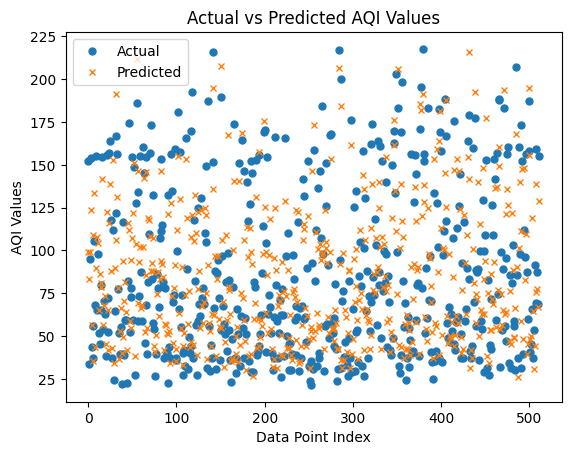

In [106]:
from sklearn.linear_model import Ridge
# Import necessary libraries
import numpy as np

# Select features (X) and target variable (y)
features = ['PM2.5', 'PM10', 'CO', 'NO2', 'SO2', 'T', 'P0', 'U', 'Month', 'Year', 'Ff', 'AQI_US_PM2.5', 'AQI_US_PM10']  # Add more features as needed
target_variable = 'Overall_AQI'  # Replace with the variable you want to predict

X = merged_df_normalized2_no_outliers[features]
y = merged_df_normalized2_no_outliers[target_variable]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

# Create a Ridge regression model
ridge_model = Ridge(alpha=0.1)  # You can adjust the alpha parameter

# Fit the model on the training data
ridge_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = ridge_model.predict(X_test)

# Evaluate the Ridge model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print(f'Mean Absolute Error: {mae}')
print(f'Mean Absolute Percentage Error: {mape}')

# Assuming 'y_test' is the actual values and 'y_pred' is the predicted values
# Make sure 'y_test' and 'y_pred' are NumPy arrays or Pandas Series for compatibility with 'np.linspace'

# Create a range of indices
indices = np.linspace(0, len(y_test) - 1, len(y_test))

# Plot actual values
plt.plot(indices, y_test, label='Actual', marker='o', linestyle='', markersize=5)

# Plot predicted values
plt.plot(indices, y_pred, label='Predicted', marker='x', linestyle='', markersize=5)

plt.xlabel('Data Point Index')
plt.ylabel('AQI Values')
plt.title('Actual vs Predicted AQI Values')
plt.legend()
plt.show()


In [103]:
from sklearn.model_selection import GridSearchCV

# Define a range of alpha values to try
alphas = [0.1, 1, 10, 100]

# Create a Ridge regression model
ridge_model = Ridge()

# Perform a grid search to find the best alpha
grid_search = GridSearchCV(ridge_model, {'alpha': alphas}, scoring='neg_mean_squared_error', cv=6)
grid_search.fit(X_train, y_train)

# Get the best alpha from the grid search
best_alpha = grid_search.best_params_['alpha']

# Create a Ridge model with the best alpha
best_ridge_model = Ridge(alpha=best_alpha)

# Fit the model on the training data
best_ridge_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_best = best_ridge_model.predict(X_test)

# Evaluate the model with the best alpha
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print(f'Best Alpha: {best_alpha}')
print(f'Mean Squared Error (Ridge): {mse_best}')
print(f'R-squared (Ridge): {r2_best}')


Best Alpha: 0.1
Mean Squared Error (Ridge): 719.8966302497765
R-squared (Ridge): 0.7020389870591495


PM2.5

Mean Squared Error: 4.46640853406124e-33
R-squared: 1.0
Mean Absolute Error: 5.618010707916555e-17
Mean Absolute Percentage Error: 0.0007587950363186373
  Feature   Coefficient
0   PM2.5  1.000000e+00
1       T  2.646243e-16
2       P  2.896606e-16


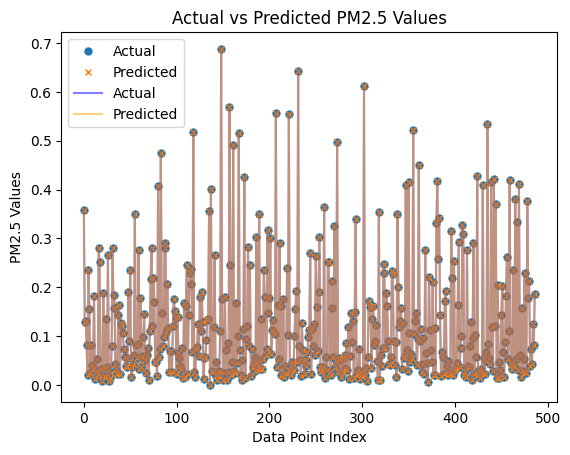

In [22]:
# Import necessary libraries
import numpy as np

# Select features (X) and target variable (y)
features = ['PM2.5', 'T', 'P']  # Add more features as needed
target_variable = 'PM2.5'  # Replace with the variable you want to predict

X = merged_df_normalized2[features]
y = merged_df_normalized2[target_variable]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print(f'Mean Absolute Error: {mae}')
print(f'Mean Absolute Percentage Error: {mape}')

# Print coefficients for each feature
coefficients = pd.DataFrame({'Feature': features, 'Coefficient': model.coef_})
print(coefficients)


# Assuming 'y_test' is the actual values and 'y_pred' is the predicted values
# Make sure 'y_test' and 'y_pred' are NumPy arrays or Pandas Series for compatibility with 'np.linspace'

# Create a range of indices
indices = np.linspace(0, len(y_test) - 1, len(y_test))

# Plot actual values
plt.plot(indices, y_test, label='Actual', marker='o', linestyle='', markersize=5)

# Plot predicted values
plt.plot(indices, y_pred, label='Predicted', marker='x', linestyle='', markersize=5)

# Connect actual and predicted values with lines
plt.plot(indices, y_test, label='Actual', linestyle='-', color='blue', alpha=0.5)
plt.plot(indices, y_pred, label='Predicted', linestyle='-', color='orange', alpha=0.5)

plt.xlabel('Data Point Index')
plt.ylabel('PM2.5 Values')
plt.title('Actual vs Predicted PM2.5 Values')
plt.legend()
plt.show()


Lasso Mean Squared Error: 0.003081371005896699
Lasso R-squared: 0.7991968614246067
Lasso Mean Absolute Error: 0.04279479234198731


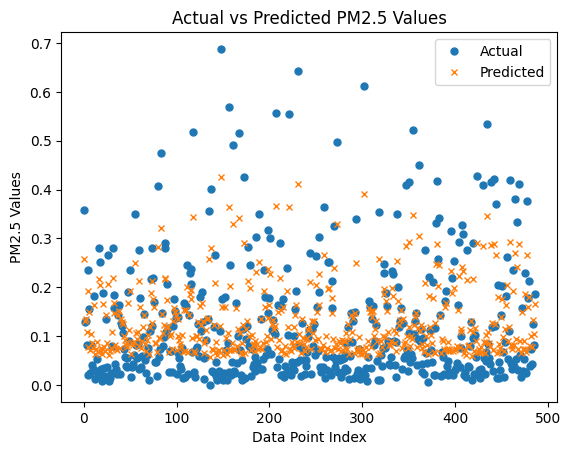

In [24]:
from sklearn.linear_model import Lasso

# Create a Lasso regression model with regularization strength (alpha)
lasso_model = Lasso(alpha=0.01)  # Adjust alpha as needed
lasso_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_lasso = lasso_model.predict(X_test)

# Evaluate the Lasso model
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)

print(f'Lasso Mean Squared Error: {mse_lasso}')
print(f'Lasso R-squared: {r2_lasso}')
print(f'Lasso Mean Absolute Error: {mae_lasso}')

indices = np.linspace(0, len(y_test) - 1, len(y_test))

# Plot actual values
plt.plot(indices, y_test, label='Actual', marker='o', linestyle='', markersize=5)

# Plot predicted values
plt.plot(indices, y_pred_lasso, label='Predicted', marker='x', linestyle='', markersize=5)

plt.xlabel('Data Point Index')
plt.ylabel('PM2.5 Values')
plt.title('Actual vs Predicted PM2.5 Values')
plt.legend()
plt.show()



PM10

In [66]:
# Select features (X) and target variable (y)
features_pm10 = ['PM10', 'T', 'P', 'P0']  # Add more features as needed
target_variable = 'PM10'  # Replace with the variable you want to predict

X_pm10 = merged_df_normalized2[features_pm10]
y_pm10 = merged_df_normalized2[target_variable]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pm10, y_pm10, test_size=0.33, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print(f'Mean Absolute Error: {mae}')
print(f'Mean Absolute Percentage Error: {mape}')

# Print coefficients for each feature
coefficients = pd.DataFrame({'Feature': features, 'Coefficient': model.coef_})
print(coefficients)


# Assuming 'y_test' is the actual values and 'y_pred' is the predicted values
# Make sure 'y_test' and 'y_pred' are NumPy arrays or Pandas Series for compatibility with 'np.linspace'

# Create a range of indices
indices = np.linspace(0, len(y_test) - 1, len(y_test))

# Plot actual values
plt.plot(indices, y_test, label='Actual', marker='o', linestyle='', markersize=5)

# Plot predicted values
plt.plot(indices, y_pred, label='Predicted', marker='x', linestyle='', markersize=5)

# Connect actual and predicted values with lines
plt.plot(indices, y_test, label='Actual', linestyle='-', color='blue', alpha=0.5)
plt.plot(indices, y_pred, label='Predicted', linestyle='-', color='orange', alpha=0.5)

plt.xlabel('Data Point Index')
plt.ylabel('PM10 Values')
plt.title('Actual vs Predicted PM10 Values')
plt.legend()
plt.show()


Mean Squared Error: 1.876541223381714e-33
R-squared: 1.0
Mean Absolute Error: 3.056069827955445e-17
Mean Absolute Percentage Error: 6.324373200049585e-16


ValueError: All arrays must be of the same length

Lasso Mean Squared Error: 3.786249914399146e-05
Lasso R-squared: 0.9981863948102218
Lasso Mean Absolute Error: 0.004217408418441565


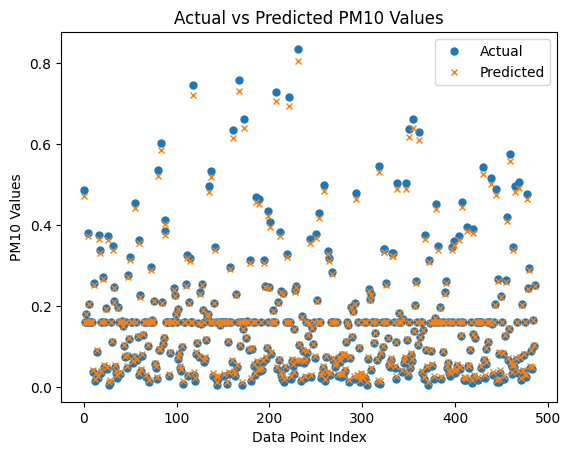

In [69]:
from sklearn.linear_model import Lasso

# Create a Lasso regression model with regularization strength (alpha)
lasso_model = Lasso(alpha=0.001)  # Adjust alpha as needed
lasso_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_lasso_pm10 = lasso_model.predict(X_test)

# Evaluate the Lasso model
mse_lasso = mean_squared_error(y_test, y_pred_lasso_pm10)
r2_lasso = r2_score(y_test, y_pred_lasso_pm10)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso_pm10)

print(f'Lasso Mean Squared Error: {mse_lasso}')
print(f'Lasso R-squared: {r2_lasso}')
print(f'Lasso Mean Absolute Error: {mae_lasso}')

indices = np.linspace(0, len(y_test) - 1, len(y_test))

# Plot actual values
plt.plot(indices, y_test, label='Actual', marker='o', linestyle='', markersize=5)

# Plot predicted values
plt.plot(indices, y_pred_lasso_pm10, label='Predicted', marker='x', linestyle='', markersize=5)


plt.xlabel('Data Point Index')
plt.ylabel('PM10 Values')
plt.title('Actual vs Predicted PM10 Values')
plt.legend()
plt.show()



Mean Squared Error (Unseen): 4.747281792078453
R-squared (Unseen): 0.9906105569622042
Mean Absolute Error (Unseen): 1.957129929802324


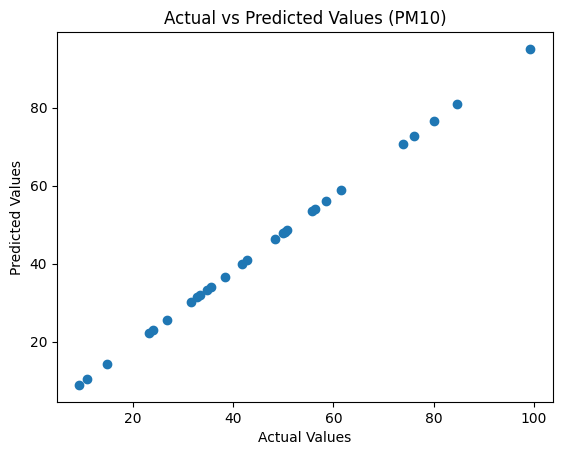

In [40]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Assuming 'lasso_model_pm10' is your trained Lasso model for PM10
unseen_data = pd.read_excel('unseen_data.xlsx')  # Load your unseen data for PM10
X_unseen_pm10 = unseen_data[features_pm10]  # Select the relevant features for PM10
y_unseen_actual_pm10 = unseen_data[target_variable]  # The actual values (ground truth) for PM10

# Make predictions on the unseen data for PM10
y_unseen_pred_lasso_pm10 = lasso_model.predict(X_unseen_pm10)

mse_unseen = mean_squared_error(y_unseen_actual_pm10, y_unseen_pred_lasso_pm10)
r2_unseen = r2_score(y_unseen_actual_pm10, y_unseen_pred_lasso_pm10)
mae_unseen = mean_absolute_error(y_unseen_actual_pm10, y_unseen_pred_lasso_pm10)

print(f'Mean Squared Error (Unseen): {mse_unseen}')
print(f'R-squared (Unseen): {r2_unseen}')
print(f'Mean Absolute Error (Unseen): {mae_unseen}')

plt.scatter(y_unseen_actual_pm10, y_unseen_pred_lasso_pm10)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (PM10)')
plt.show()

AQI_PM2.5

Mean Squared Error: 81.37809657588596
R-squared: 0.9693818904177663
Mean Absolute Error: 1.1714471501685275


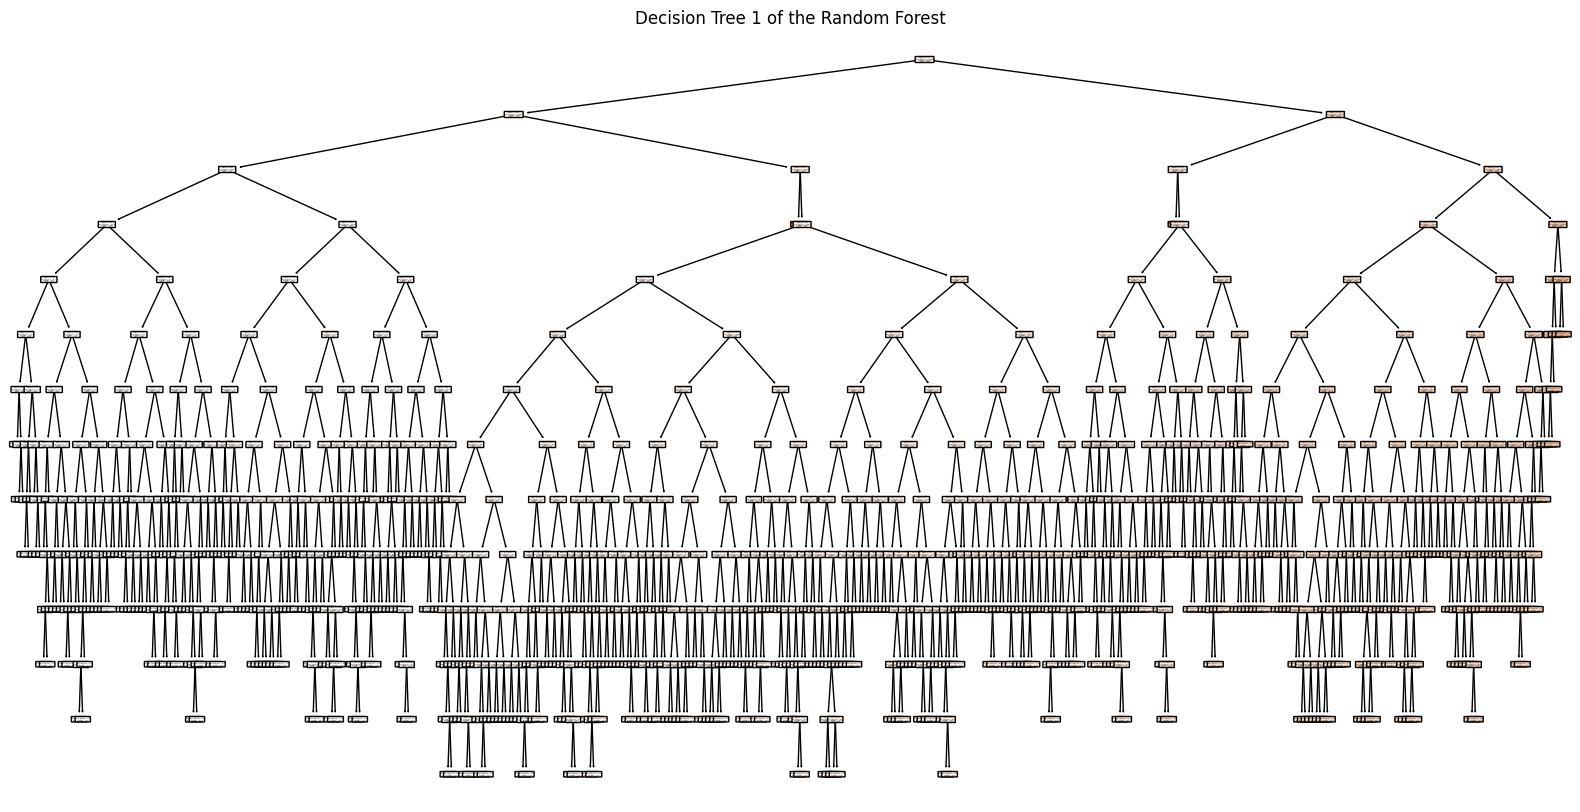

In [25]:
from sklearn.ensemble import RandomForestRegressor

X = merged_df_normalized2[['PM2.5', 'PM10', 'CO', 'SO2', 'T', 'U', 'Year']]
y = merged_df_normalized2['AQI_US_PM2.5']

# Initialize the Linear Regression model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Create a Random Forest Regression model
rf_model = RandomForestRegressor(n_estimators=1000, random_state=42)

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print(f'Mean Absolute Error: {mae}')

# Plot actual vs predicted values
#sns.kdeplot(y_test, label='Actual', fill=True)
#sns.kdeplot(y_pred, label='Predicted', fill=True)
#plt.xlabel('AQI_US_PM2.5')
#plt.ylabel('Density')
#plt.title(f'Distribution of Actual vs Predicted AQI_PM2.5')
#plt.legend()
#plt.show()


from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Assuming 'rf_model' is your trained Random Forest model
# You can choose the index of the tree you want to visualize (e.g., 0 for the first tree)
tree_index = 0

plt.figure(figsize=(20, 10))
plot_tree(rf_model.estimators_[tree_index], filled=True, feature_names=X.columns.tolist(), rounded=True, proportion=True, precision=2)
plt.title(f'Decision Tree {tree_index + 1} of the Random Forest')
plt.show()


In [20]:
from sklearn.ensemble import RandomForestRegressor

X = merged_df_normalized2_no_outliers2[['PM2.5', 'PM10', 'CO', 'SO2', 'T', 'U', 'Year']]
y = merged_df_normalized2_no_outliers2['AQI_US_PM2.5']

# Initialize the Linear Regression model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

# Create a Random Forest Regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print(f'Mean Absolute Error: {mae}')

# Plot actual vs predicted values
sns.kdeplot(y_test, label='Actual', fill=True)
sns.kdeplot(y_pred, label='Predicted', fill=True)
plt.xlabel('AQI_US_PM2.5')
plt.ylabel('Density')
plt.title(f'Distribution of Actual vs Predicted AQI_PM2.5')
plt.legend()
plt.show()


NameError: name 'merged_df_normalized2_no_outliers2' is not defined

AQI_PM10

C:\Users\Sagat\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Sagat\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Sagat\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g

Mean Squared Error (ARIMA): 730.9186921912706
R-squared (ARIMA): 0.45765914018374865
Mean Absolute Error (ARIMA): 6.32559956832212


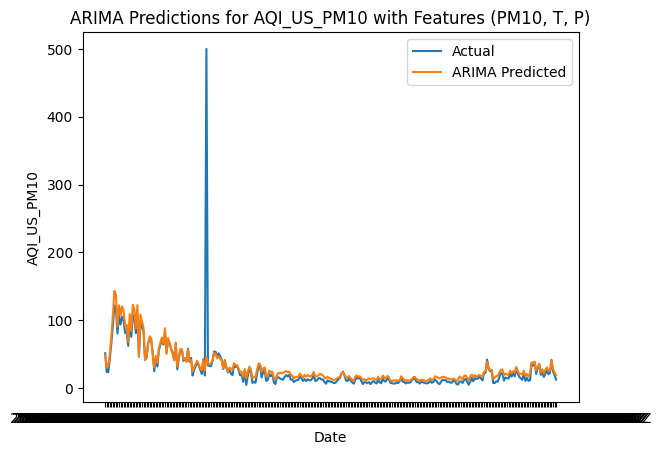

295 295 295


In [49]:
from statsmodels.tsa.arima.model import ARIMA


# Assuming 'df' is your DataFrame with the relevant data
df = merged_df_normalized2.copy()

# Select the relevant columns for time series analysis
time_series_data = df[['Timestamp(UTC)', 'AQI_US_PM10', 'PM10', 'T', 'P']]
time_series_data.set_index('Timestamp(UTC)', inplace=True)

# Train-test split for time series data
train_size = int(len(time_series_data) * 0.8)
train_data, test_data = time_series_data.iloc[:train_size], time_series_data.iloc[train_size:]

# Fit ARIMA model with additional features
order = (0, 1, 1)  # Example order, you may need to tune this
exog_features = train_data[['PM10', 'T', 'P']]
arima_model = ARIMA(train_data['AQI_US_PM10'], order=order, exog=exog_features)
arima_result = arima_model.fit()

# Make predictions on the test data
exog_features_test = test_data[['PM10', 'T', 'P']]
y_pred_arima = arima_result.get_forecast(steps=len(test_data), exog=exog_features_test).predicted_mean

# Evaluate the ARIMA model
mse_arima = mean_squared_error(test_data['AQI_US_PM10'], y_pred_arima)
r2_arima = r2_score(test_data['AQI_US_PM10'], y_pred_arima)
mae_arima = mean_absolute_error(test_data['AQI_US_PM10'], y_pred_arima)

print(f'Mean Squared Error (ARIMA): {mse_arima}')
print(f'R-squared (ARIMA): {r2_arima}')
print(f'Mean Absolute Error (ARIMA): {mae_arima}')

# Plot actual vs predicted values
# Plot actual vs predicted values
plt.plot(test_data['AQI_US_PM10'], label='Actual')
plt.plot(test_data.index, y_pred_arima, label='ARIMA Predicted')  # Use the correct timestamps
plt.legend()
plt.xlabel('Date')
plt.ylabel('AQI_US_PM10')
plt.title('ARIMA Predictions for AQI_US_PM10 with Features (PM10, T, P)')
plt.show()

timestamps = test_data.index  # Use the correct timestamps for the test set
actual_data = test_data['AQI_US_PM10']
predicted_data = y_pred_arima

print(len(timestamps), len(actual_data), len(predicted_data))



C:\Users\Sagat\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Sagat\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Sagat\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g

Mean Squared Error (ARIMA): 46.368050518624266
R-squared (ARIMA): 0.9216235842631565
Mean Absolute Error (ARIMA): 6.167885881330873


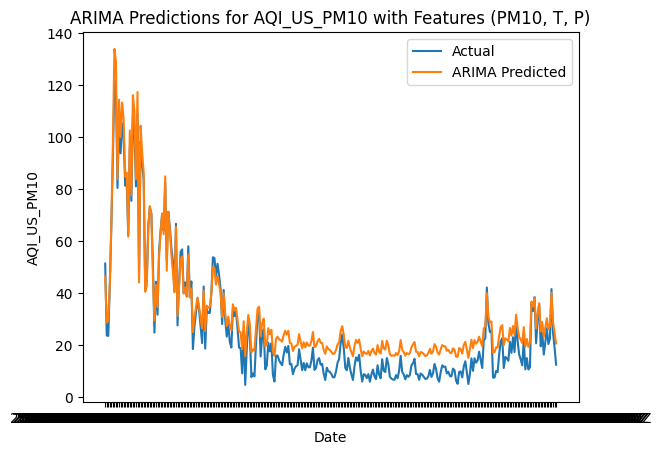

294 294 294


In [120]:
from statsmodels.tsa.arima.model import ARIMA


# Assuming 'df' is your DataFrame with the relevant data
df = merged_df_normalized2_no_outliers3.copy()

# Select the relevant columns for time series analysis
time_series_data = df[['Timestamp(UTC)', 'AQI_US_PM10', 'PM10', 'T', 'P']]
time_series_data.set_index('Timestamp(UTC)', inplace=True)

# Train-test split for time series data
train_size = int(len(time_series_data) * 0.8)
train_data, test_data = time_series_data.iloc[:train_size], time_series_data.iloc[train_size:]

# Fit ARIMA model with additional features
order = (3, 1, 3)  # Example order, you may need to tune this
exog_features = train_data[['PM10', 'T', 'P']]
arima_model = ARIMA(train_data['AQI_US_PM10'], order=order, exog=exog_features)
arima_result = arima_model.fit()

# Make predictions on the test data
exog_features_test = test_data[['PM10', 'T', 'P']]
y_pred_arima = arima_result.get_forecast(steps=len(test_data), exog=exog_features_test).predicted_mean

# Evaluate the ARIMA model
mse_arima = mean_squared_error(test_data['AQI_US_PM10'], y_pred_arima)
r2_arima = r2_score(test_data['AQI_US_PM10'], y_pred_arima)
mae_arima = mean_absolute_error(test_data['AQI_US_PM10'], y_pred_arima)

print(f'Mean Squared Error (ARIMA): {mse_arima}')
print(f'R-squared (ARIMA): {r2_arima}')
print(f'Mean Absolute Error (ARIMA): {mae_arima}')

# Plot actual vs predicted values
# Plot actual vs predicted values
plt.plot(test_data['AQI_US_PM10'], label='Actual')
plt.plot(test_data.index, y_pred_arima, label='ARIMA Predicted')  # Use the correct timestamps
plt.legend()
plt.xlabel('Date')
plt.ylabel('AQI_US_PM10')
plt.title('ARIMA Predictions for AQI_US_PM10 with Features (PM10, T, P)')
plt.show()

# Assuming 'actual_data' and 'predicted_data' are your actual and predicted time series
# Assuming 'timestamps' is the timestamp column from your data

timestamps = test_data.index  # Use the correct timestamps for the test set
actual_data = test_data['AQI_US_PM10']
predicted_data = y_pred_arima

print(len(timestamps), len(actual_data), len(predicted_data))



C:\Users\Sagat\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Sagat\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Sagat\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g

Mean Squared Error (ARIMA): 50.30121368287442
R-squared (ARIMA): 0.9149753161588442
Mean Absolute Error (ARIMA): 6.416536984820655


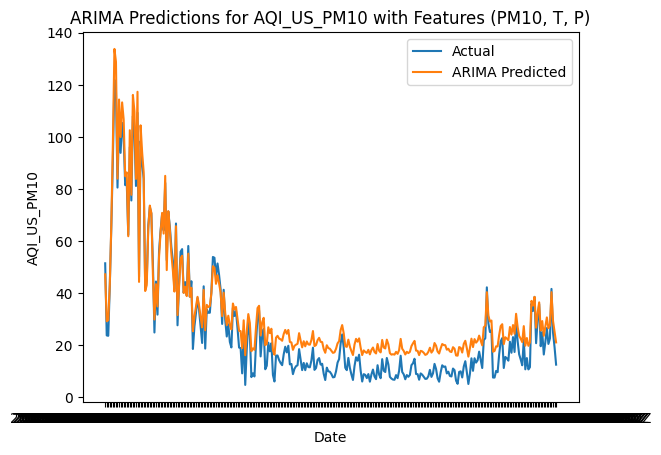

294 294 294


In [85]:
from statsmodels.tsa.arima.model import ARIMA


# Assuming 'df' is your DataFrame with the relevant data
df = merged_df_normalized2_no_outliers.copy()

# Select the relevant columns for time series analysis
time_series_data = df[['Timestamp(UTC)', 'AQI_US_PM10', 'PM10', 'T', 'P']]
time_series_data.set_index('Timestamp(UTC)', inplace=True)

# Train-test split for time series data
train_size = int(len(time_series_data) * 0.8)
train_data, test_data = time_series_data.iloc[:train_size], time_series_data.iloc[train_size:]

# Fit ARIMA model with additional features
order = (0, 1, 1)  # Example order, you may need to tune this
exog_features = train_data[['PM10', 'T', 'P']]
arima_model = ARIMA(train_data['AQI_US_PM10'], order=order, exog=exog_features)
arima_result = arima_model.fit()

# Make predictions on the test data
exog_features_test = test_data[['PM10', 'T', 'P']]
y_pred_arima = arima_result.get_forecast(steps=len(test_data), exog=exog_features_test).predicted_mean

# Evaluate the ARIMA model
mse_arima = mean_squared_error(test_data['AQI_US_PM10'], y_pred_arima)
r2_arima = r2_score(test_data['AQI_US_PM10'], y_pred_arima)
mae_arima = mean_absolute_error(test_data['AQI_US_PM10'], y_pred_arima)

print(f'Mean Squared Error (ARIMA): {mse_arima}')
print(f'R-squared (ARIMA): {r2_arima}')
print(f'Mean Absolute Error (ARIMA): {mae_arima}')

# Plot actual vs predicted values
# Plot actual vs predicted values
plt.plot(test_data['AQI_US_PM10'], label='Actual')
plt.plot(test_data.index, y_pred_arima, label='ARIMA Predicted')  # Use the correct timestamps
plt.legend()
plt.xlabel('Date')
plt.ylabel('AQI_US_PM10')
plt.title('ARIMA Predictions for AQI_US_PM10 with Features (PM10, T, P)')
plt.show()

# Assuming 'actual_data' and 'predicted_data' are your actual and predicted time series
# Assuming 'timestamps' is the timestamp column from your data

timestamps = test_data.index  # Use the correct timestamps for the test set
actual_data = test_data['AQI_US_PM10']
predicted_data = y_pred_arima

print(len(timestamps), len(actual_data), len(predicted_data))



In [87]:
from statsmodels.tsa.arima.model import ARIMA


# Assuming 'df' is your DataFrame with the relevant data
dss = merged_df_normalized_no_outliers.copy()

# Select the relevant columns for time series analysis
time_series_data = dss[['Timestamp(UTC)', 'AQI_US_PM10', 'PM10', 'T', 'P']]
time_series_data.set_index('Timestamp(UTC)', inplace=True)

# Train-test split for time series data
train_size = int(len(time_series_data) * 0.8)
train_data, test_data = time_series_data.iloc[:train_size], time_series_data.iloc[train_size:]

# Fit ARIMA model with additional features
order = (0, 1, 1)  # Example order, you may need to tune this
exog_features = train_data[['PM10', 'T', 'P']]
arima_model = ARIMA(train_data['AQI_US_PM10'], order=order, exog=exog_features)
arima_result = arima_model.fit()

# Make predictions on the test data
exog_features_test = test_data[['PM10', 'T', 'P']]
y_pred_arima = arima_result.get_forecast(steps=len(test_data), exog=exog_features_test).predicted_mean

# Evaluate the ARIMA model
mse_arima = mean_squared_error(test_data['AQI_US_PM10'], y_pred_arima)
r2_arima = r2_score(test_data['AQI_US_PM10'], y_pred_arima)
mae_arima = mean_absolute_error(test_data['AQI_US_PM10'], y_pred_arima)

print(f'Mean Squared Error (ARIMA): {mse_arima}')
print(f'R-squared (ARIMA): {r2_arima}')
print(f'Mean Absolute Error (ARIMA): {mae_arima}')

# Plot actual vs predicted values
# Plot actual vs predicted values
plt.plot(test_data['AQI_US_PM10'], label='Actual')
plt.plot(test_data.index, y_pred_arima, label='ARIMA Predicted')  # Use the correct timestamps
plt.legend()
plt.xlabel('Date')
plt.ylabel('AQI_US_PM10')
plt.title('ARIMA Predictions for AQI_US_PM10 with Features (PM10, T, P)')
plt.show()

# Assuming 'actual_data' and 'predicted_data' are your actual and predicted time series
# Assuming 'timestamps' is the timestamp column from your data

timestamps = test_data.index  # Use the correct timestamps for the test set
actual_data = test_data['AQI_US_PM10']
predicted_data = y_pred_arima

print(len(timestamps), len(actual_data), len(predicted_data))



MissingDataError: exog contains inf or nans

In [82]:
import itertools
import statsmodels.api as sm

# Assuming 'train_data' is your training data
y_train = train_data['AQI_US_PM10']

# Define the range for p, d, q
p = d = q = range(0, 4)

# Generate all possible combinations of p, d, q
pdq = list(itertools.product(p, d, q))

# Perform grid search
best_aic = float('inf')
best_params = None

for param in pdq:
    try:
        mod = sm.tsa.ARIMA(y_train, order=param)
        results = mod.fit()

        # Choose the model with the lowest AIC
        if results.aic < best_aic:
            best_aic = results.aic
            best_params = param

    except:
        continue

print(f'Best AIC: {best_aic}')
print(f'Best (p, d, q): {best_params}')


C:\Users\Sagat\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Sagat\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Sagat\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g

Best AIC: 8704.86009582009
Best (p, d, q): (3, 1, 3)
